Viktor Sas 465692

In [83]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import shap

# Data visualization
import missingno as msno

# Data preprocessing
from collections import Counter
from sklearn.preprocessing import PowerTransformer, LabelEncoder, StandardScaler
from scipy.stats import skew, boxcox
from feature_engine.transformation import YeoJohnsonTransformer

# Sampling
from imblearn.over_sampling import SMOTE

# Model selection
from sklearn.model_selection import (
    train_test_split, StratifiedKFold, KFold,
    cross_val_score, cross_validate
)

# Classifiers
from sklearn.ensemble import (
    StackingClassifier, RandomForestClassifier,
    ExtraTreesClassifier, GradientBoostingClassifier,
    AdaBoostClassifier
)
from sklearn.linear_model import (
    LogisticRegression, SGDClassifier
)
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Boosting libraries
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Metrics
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score,
    precision_score, recall_score,
    f1_score, roc_auc_score, make_scorer
)

# Hyperparameter optimization
import optuna


In [86]:
df = pd.read_csv('full_dataset_FINAL.csv')

In [87]:
df.columns

Index(['Unnamed: 0', 'Depth', 'pH_CaCl2', 'pH_H2O', 'EC', 'OC', 'P', 'N', 'K',
       'NUTS_0', 'NUTS_1', 'NUTS_2', 'NUTS_3', 'TH_LAT', 'TH_LONG', 'Elev',
       'LC0_Desc', 'LU1_Desc', 'target', 'GRID_NO_2018-01', 'LATITUDE_2018-01',
       'LONGITUDE_2018-01', 'ALTITUDE_2018-01', 'LEVL_CODE_2018-01',
       'MOUNT_TYPE_2018-01', 'URBN_TYPE_2018-01', 'COAST_TYPE_2018-01', 'code',
       'TEMP_MAX_WINTER', 'TEMP_MAX_SPRING', 'TEMP_MAX_SUMMER',
       'TEMP_MAX_FALL', 'TEMP_MIN_WINTER', 'TEMP_MIN_SPRING',
       'TEMP_MIN_SUMMER', 'TEMP_MIN_FALL', 'TEMP_AVG_WINTER',
       'TEMP_AVG_SPRING', 'TEMP_AVG_SUMMER', 'TEMP_AVG_FALL', 'PRECIP_WINTER',
       'PRECIP_SPRING', 'PRECIP_SUMMER', 'PRECIP_FALL', 'ETO_WINTER',
       'ETO_SPRING', 'ETO_SUMMER', 'ETO_FALL', 'WIND_WINTER', 'WIND_SPRING',
       'WIND_SUMMER', 'WIND_FALL'],
      dtype='object')

In [90]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [92]:
df.head()

Depth  pH_CaCl2  pH_H2O     EC    OC     P    N      K NUTS_0 NUTS_1  \
0  0-20 cm       4.1    4.81   8.73  12.4   0.0  1.1  101.9     AT    AT1   
1  0-20 cm       4.1    4.93   5.06  16.7   0.0  1.3   51.2     AT    AT1   
2  0-20 cm       4.1    4.85  12.53  47.5  12.3  3.1  114.8     AT    AT1   
3  0-20 cm       5.5    5.80  21.10  28.1   0.0  2.0  165.8     AT    AT1   
4  0-20 cm       6.1    6.48  10.89  19.4   0.0  2.2   42.1     AT    AT1   

   ... PRECIP_SUMMER PRECIP_FALL  ETO_WINTER  ETO_SPRING  ETO_SUMMER  \
0  ...      2.889695    1.577778    0.467554    2.720258     4.21702   
1  ...      2.889695    1.577778    0.467554    2.720258     4.21702   
2  ...      2.889695    1.577778    0.467554    2.720258     4.21702   
3  ...      2.889695    1.577778    0.467554    2.720258     4.21702   
4  ...      2.889695    1.577778    0.467554    2.720258     4.21702   

   ETO_FALL WIND_WINTER WIND_SPRING  WIND_SUMMER  WIND_FALL  
0  1.467303     1.52909    1.699892     1.685681   1.493297  
1  1.467303     1.52909    1.699892     1.685681   1.493297  
2  1.467303     1.52909    1.699892     1.685681   1.493297  
3  1.467303     1.52909    1.699892     1.685681   1.493297  
4  1.467303     1.52909    1.699892     1.685681   1.493297  

[5 rows x 51 columns]

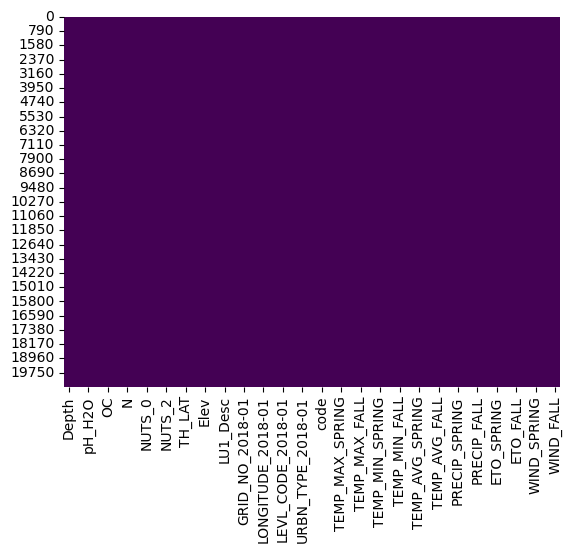

In [95]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

Count  Proportion
target                                                      
no crop                                    12879      0.6275
Common wheat                                1738      0.0847
Barley                                      1113      0.0542
Maize                                        966      0.0471
Rape and turnip rape                         455      0.0222
Olive groves                                 426      0.0208
Sunflower                                    357      0.0174
Vineyards                                    323      0.0157
Oats                                         255      0.0124
Rye                                          236      0.0115
Durum wheat                                  222      0.0108
Lucerne                                      219      0.0107
Dry pulses                                   182      0.0089
Nuts trees                                   134      0.0065
Potatoes                                     131      0.0064
Sugar beet                                   128      0.0062
Triticale                                    120      0.0058
Other Leguminous  and mixtures for fodder    101      0.0049
Other fruit trees and berries                 68      0.0033
Mix of cereals                                65      0.0032
Soya                                          57      0.0028
Apple fruit                                   52      0.0025
Other fibre and oleaginous crops              49      0.0024
Other fresh vegetables                        44      0.0021
Clovers                                       41      0.0020
Other root crops                              29      0.0014
Pear fruit                                    25      0.0012
Other cereals                                 25      0.0012
Cotton                                        24      0.0012
Cherry fruit                                  20      0.0010
Tomatoes                                      16      0.0008
Oranges                                       12      0.0006
Rice                                           8      0.0004
Strawberries                                   3      0.0001
Tobacco                                        2      0.0001

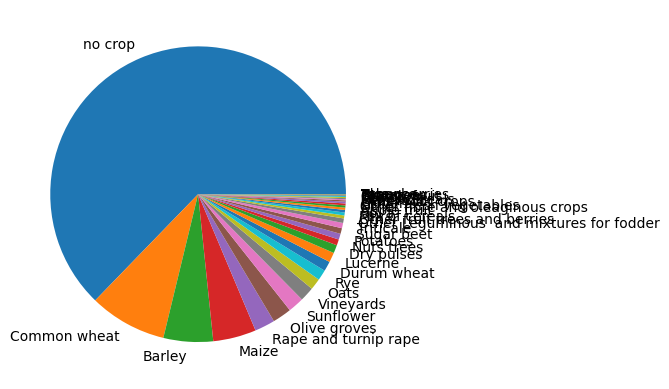

In [97]:
value_count = df['target'].value_counts()
ratio = value_count/len(df)

class_balance_df = pd.DataFrame({
    'Count': value_count,
    'Proportion':np.round(ratio,4)
})
display(class_balance_df)

plt.pie(class_balance_df['Proportion'], labels=class_balance_df.index)
plt.show()

In [100]:
df = df[df['target'] != 'no crop'].reset_index(drop=True)
df = df[df['target'] != 'Tobacco'].reset_index(drop=True)


In [103]:
crop_to_category = {
    'Common wheat': 'Cereals',
    'Barley': 'Cereals',
    'Maize': 'Cereals',
    'Rape and turnip rape': 'Oilseeds and Pulses',
    'Olive groves': 'Fruits and Nuts',
    'Sunflower': 'Oilseeds and Pulses',
    'Vineyards': 'Fruits and Nuts',
    'Oats': 'Cereals',
    'Rye': 'Cereals',
    'Durum wheat': 'Cereals',
    'Lucerne': 'Perennial Crops',
    'Dry pulses': 'Oilseeds and Pulses',
    'Nuts trees': 'Fruits and Nuts',
    'Potatoes': 'Root Crops',
    'Sugar beet': 'Root Crops',
    'Triticale': 'Cereals',
    'Other Leguminous  and mixtures for fodder': 'Oilseeds and Pulses',
    'Other fruit trees and berries': 'Fruits and Nuts',
    'Mix of cereals': 'Cereals',
    'Soya': 'Oilseeds and Pulses',
    'Apple fruit': 'Fruits and Nuts',
    'Other fibre and oleaginous crops': 'Industrial Crops',
    'Other fresh vegetables': 'Vegetables',
    'Clovers': 'Oilseeds and Pulses',
    'Other root crops': 'Root Crops',
    'Pear fruit': 'Fruits and Nuts',
    'Other cereals': 'Cereals',
    'Cotton': 'Industrial Crops',
    'Cherry fruit': 'Fruits and Nuts',
    'Tomatoes': 'Vegetables',
    'Oranges': 'Fruits and Nuts',
    'Rice': 'Cereals',
    'Strawberries': 'Fruits and Nuts',
}


In [105]:
df['category'] = df['target'].map(crop_to_category)

In [107]:
df = df[df['category'] != 'Vegetables'].reset_index(drop=True)
df = df[df['category'] != 'Industrial Crops'].reset_index(drop=True)

Count  Proportion
category                              
Cereals               4748      0.6321
Oilseeds and Pulses   1193      0.1588
Fruits and Nuts       1063      0.1415
Root Crops             288      0.0383
Perennial Crops        219      0.0292

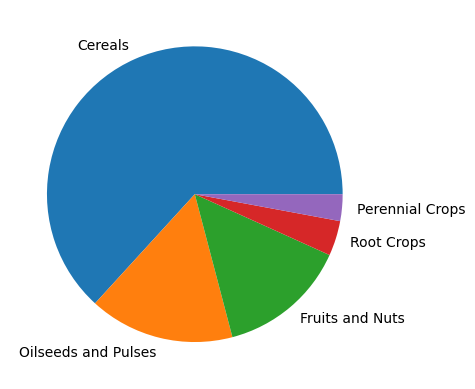

In [110]:
##new value count:
value_count = df['category'].value_counts()
ratio = value_count/len(df)

class_balance_df = pd.DataFrame({
    'Count': value_count,
    'Proportion':np.round(ratio,4)
})
display(class_balance_df)

plt.pie(class_balance_df['Proportion'], labels=class_balance_df.index)
plt.show()

In [119]:
df.dropna(inplace=True)

In [134]:
model_df = df.drop(columns=['NUTS_0', 'NUTS_1', 'NUTS_2','NUTS_3','TH_LAT', 'TH_LONG','LC0_Desc','LU1_Desc','target','Depth'])

In [136]:
model_df.dtypes

pH_CaCl2              float64
pH_H2O                float64
EC                    float64
OC                    float64
P                     float64
N                     float64
K                     float64
Elev                    int64
GRID_NO_2018-01       float64
LATITUDE_2018-01      float64
LONGITUDE_2018-01     float64
ALTITUDE_2018-01      float64
LEVL_CODE_2018-01     float64
MOUNT_TYPE_2018-01    float64
URBN_TYPE_2018-01     float64
COAST_TYPE_2018-01    float64
code                   object
TEMP_MAX_WINTER       float64
TEMP_MAX_SPRING       float64
TEMP_MAX_SUMMER       float64
TEMP_MAX_FALL         float64
TEMP_MIN_WINTER       float64
TEMP_MIN_SPRING       float64
TEMP_MIN_SUMMER       float64
TEMP_MIN_FALL         float64
TEMP_AVG_WINTER       float64
TEMP_AVG_SPRING       float64
TEMP_AVG_SUMMER       float64
TEMP_AVG_FALL         float64
PRECIP_WINTER         float64
PRECIP_SPRING         float64
PRECIP_SUMMER         float64
PRECIP_FALL           float64
ETO_WINTER

In [138]:
mod_cat_col = model_df.select_dtypes(include=object).columns.tolist()
mod_cat_col.remove('category')
print(mod_cat_col)

['code']


In [140]:
y = model_df['category']
y.head()

0                Cereals
1    Oilseeds and Pulses
2        Fruits and Nuts
3    Oilseeds and Pulses
4                Cereals
Name: category, dtype: object

Using One-Hot-Encoding to encode the categorical variables into binary columns

In [143]:
model_df = pd.get_dummies(model_df,columns=mod_cat_col)

Train Test split before applying SMOTE, due to class imbalance we can see that some classes are really under represented.

In [146]:
train, test = train_test_split(model_df, test_size=0.2, random_state=42)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

print("Train/Test shapes:")
print(train.shape, test.shape)
print(round((100 * train.shape[0] / df.shape[0]), 2),
      round((100 * test.shape[0] / df.shape[0]), 2))


X_train, y_train = train.drop(columns='category'), train['category']
X_test, y_test = test.drop(columns='category'), test['category']

print("Train/Test feature-target shapes:")
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print("Class distribution before SMOTE:", Counter(y_train))


Train/Test shapes:
(6008, 49) (1503, 49)
79.99 20.01
Train/Test feature-target shapes:
(6008, 48) (6008,)
(1503, 48) (1503,)
Class distribution before SMOTE: Counter({'Cereals': 3804, 'Oilseeds and Pulses': 948, 'Fruits and Nuts': 858, 'Root Crops': 226, 'Perennial Crops': 172})


In [148]:
X_num_col = X_train.select_dtypes(include=np.number).columns.tolist()
print(X_num_col)

['pH_CaCl2', 'pH_H2O', 'EC', 'OC', 'P', 'N', 'K', 'Elev', 'GRID_NO_2018-01', 'LATITUDE_2018-01', 'LONGITUDE_2018-01', 'ALTITUDE_2018-01', 'LEVL_CODE_2018-01', 'MOUNT_TYPE_2018-01', 'URBN_TYPE_2018-01', 'COAST_TYPE_2018-01', 'TEMP_MAX_WINTER', 'TEMP_MAX_SPRING', 'TEMP_MAX_SUMMER', 'TEMP_MAX_FALL', 'TEMP_MIN_WINTER', 'TEMP_MIN_SPRING', 'TEMP_MIN_SUMMER', 'TEMP_MIN_FALL', 'TEMP_AVG_WINTER', 'TEMP_AVG_SPRING', 'TEMP_AVG_SUMMER', 'TEMP_AVG_FALL', 'PRECIP_WINTER', 'PRECIP_SPRING', 'PRECIP_SUMMER', 'PRECIP_FALL', 'ETO_WINTER', 'ETO_SPRING', 'ETO_SUMMER', 'ETO_FALL', 'WIND_WINTER', 'WIND_SPRING', 'WIND_SUMMER', 'WIND_FALL']


Checking which transformation could fix the skeweness of the data best.

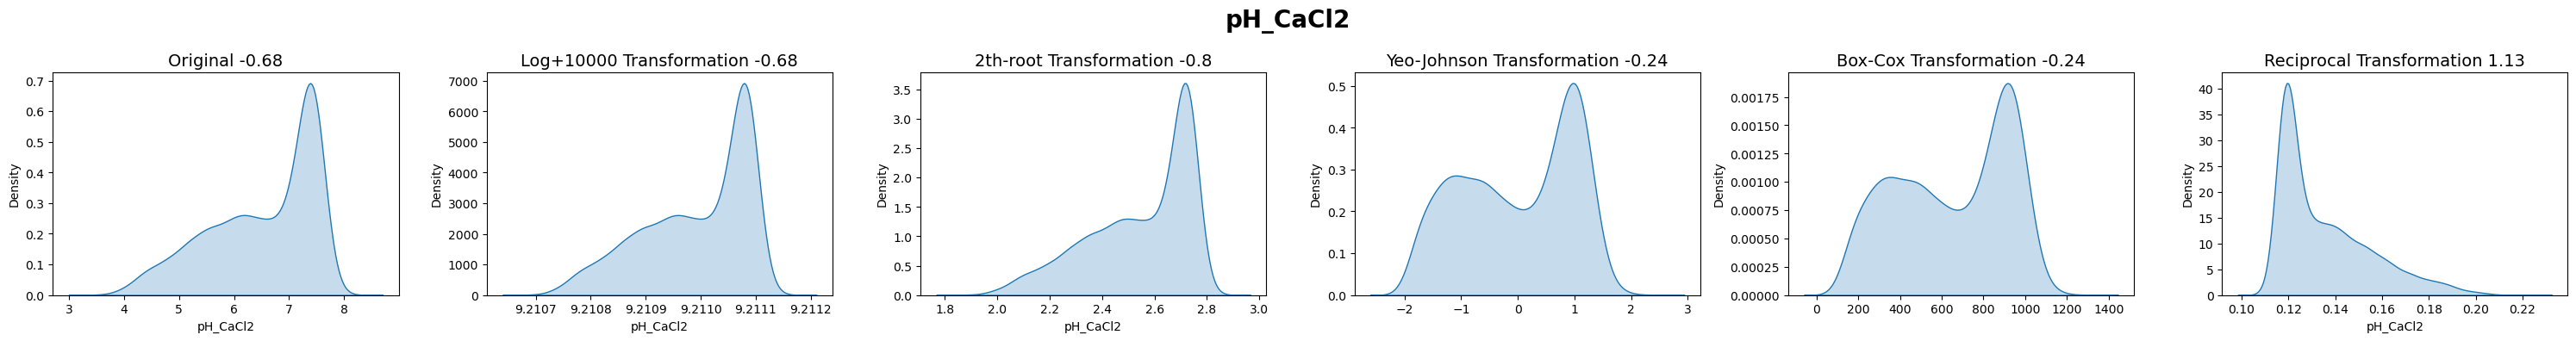

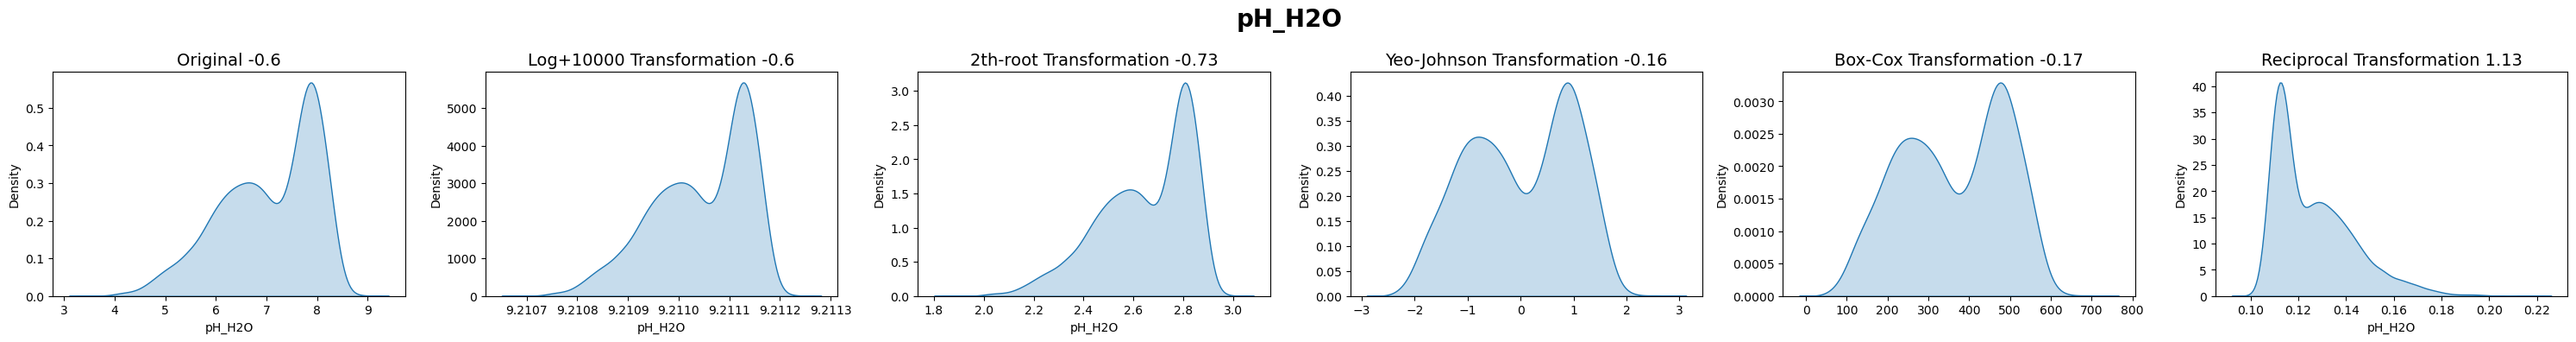

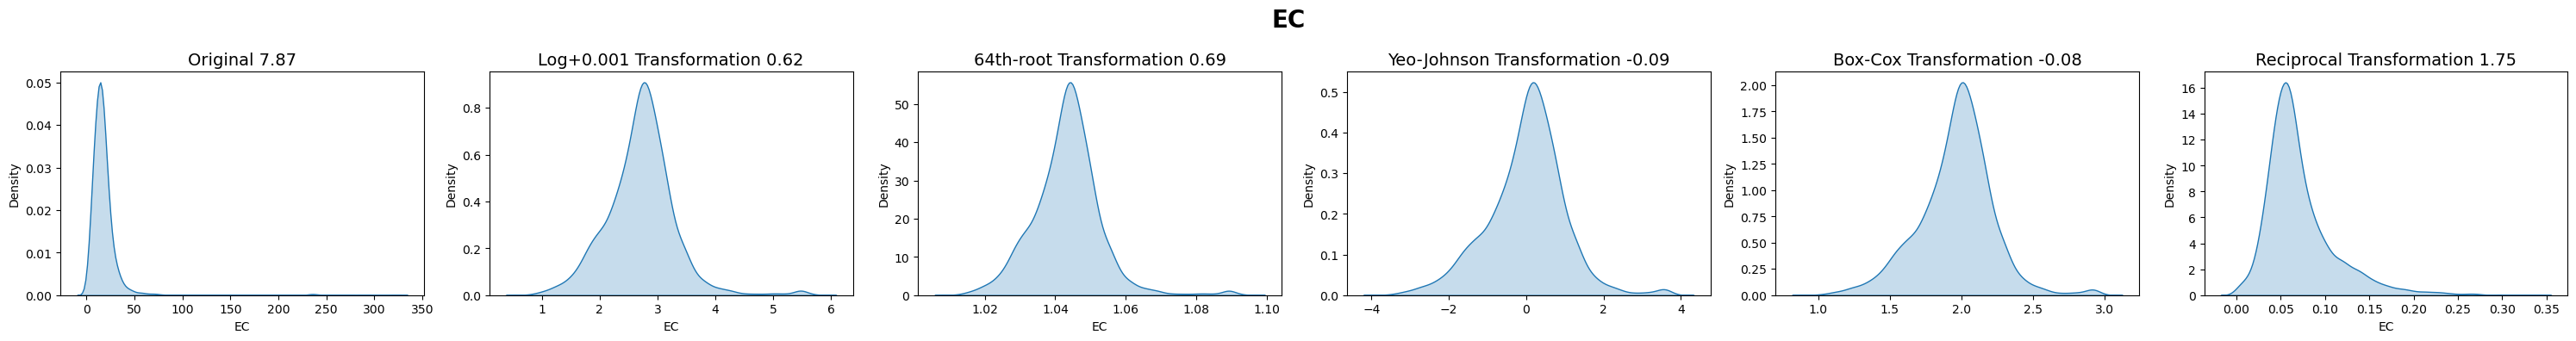

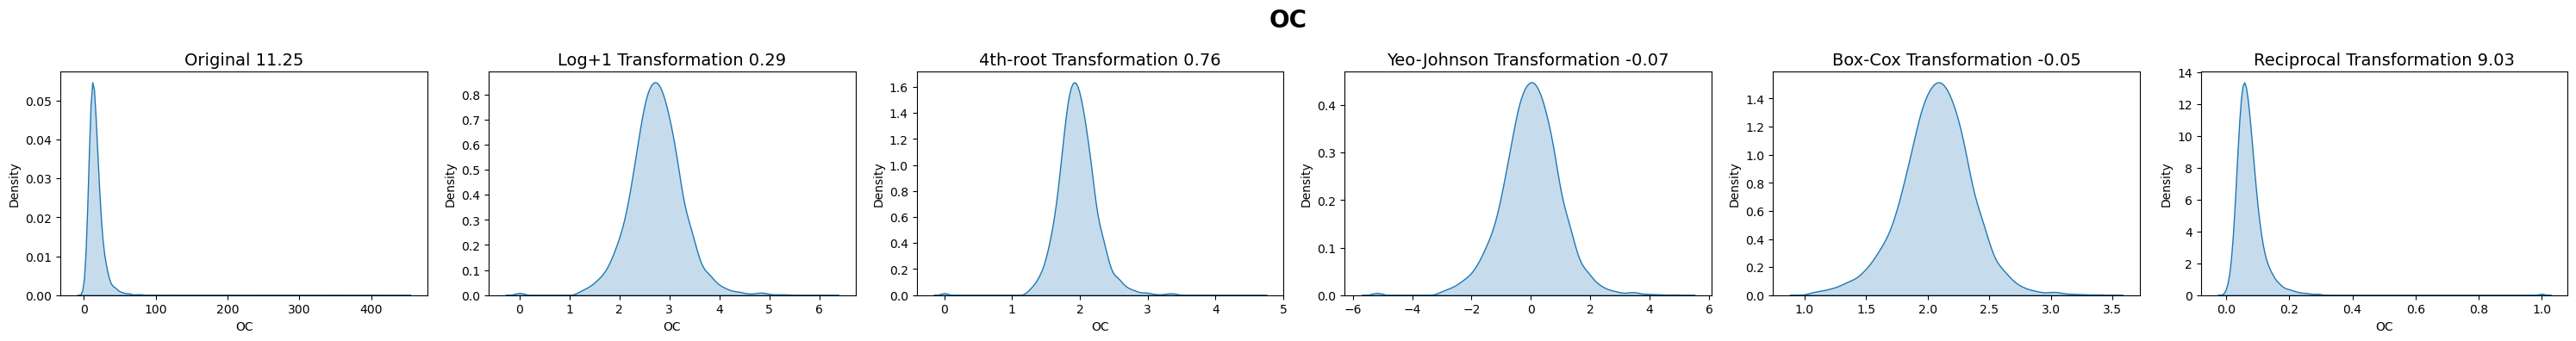

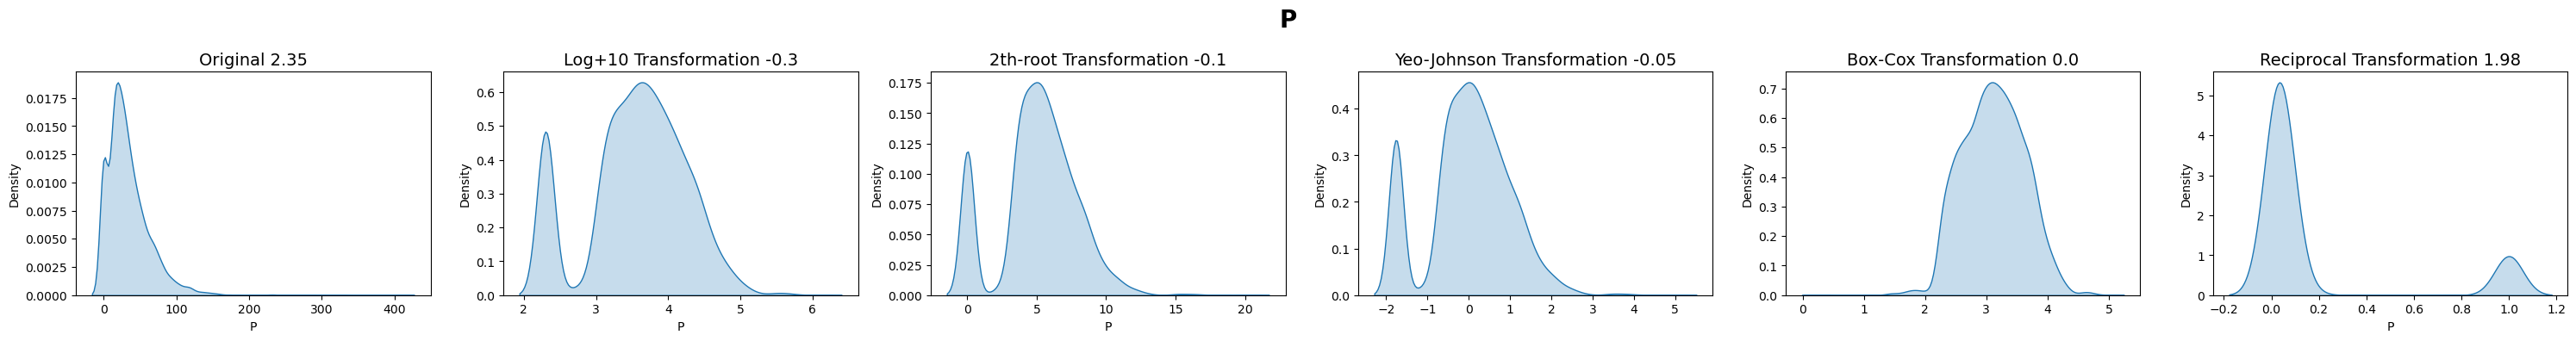

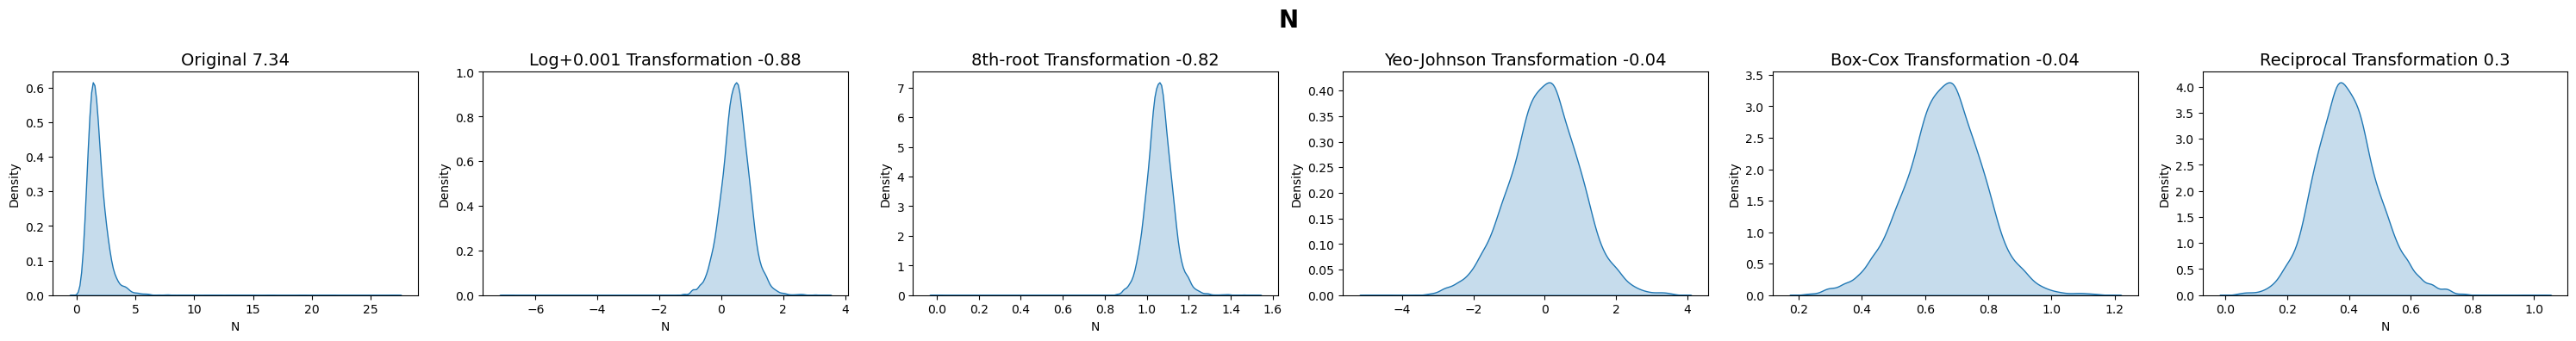

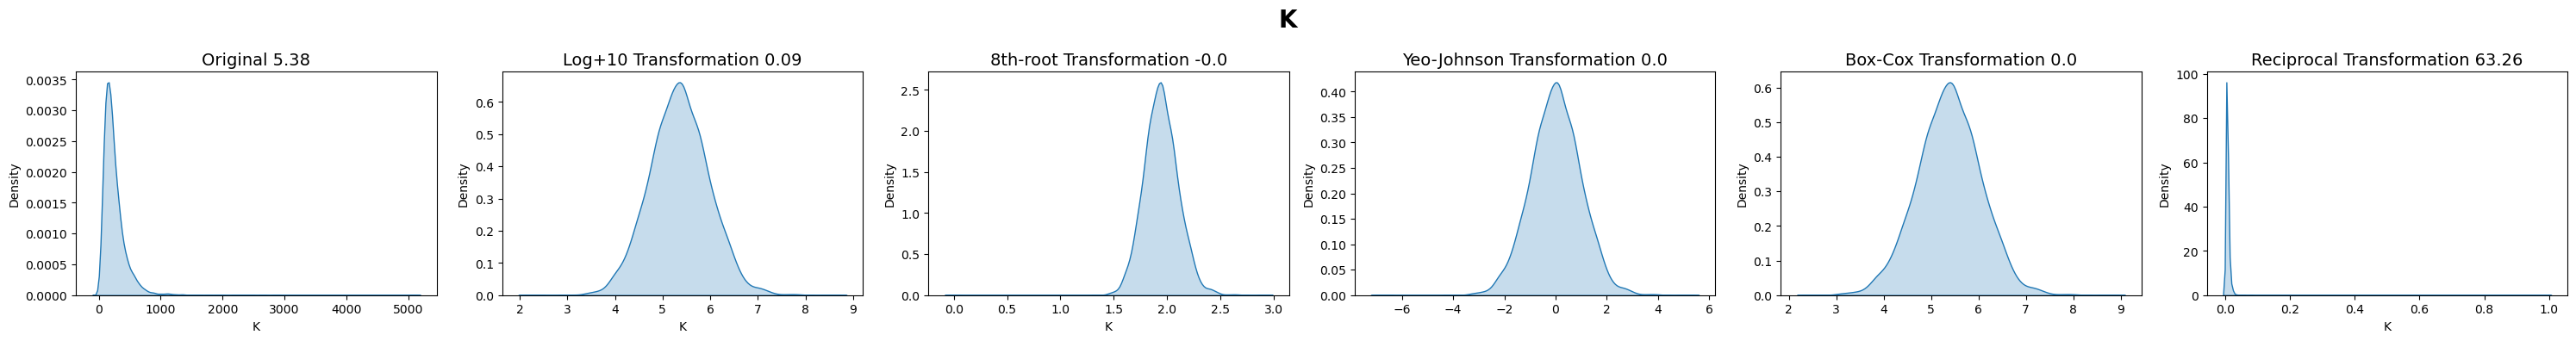

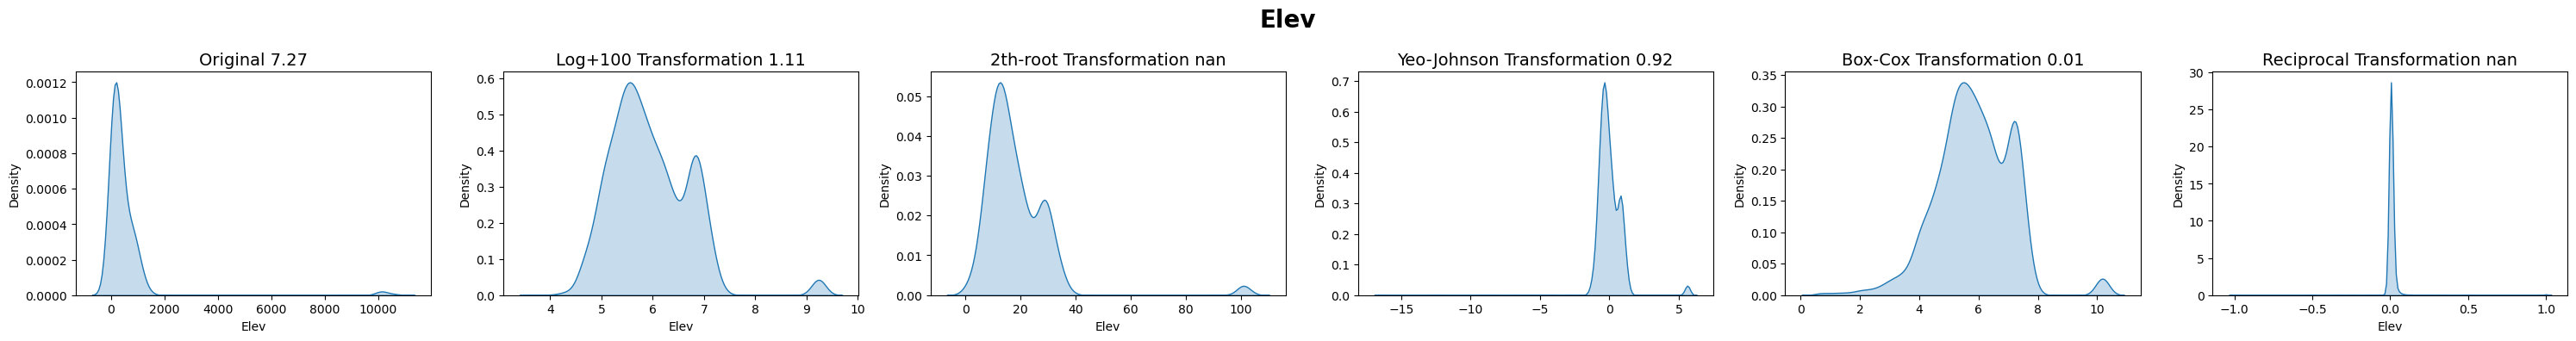

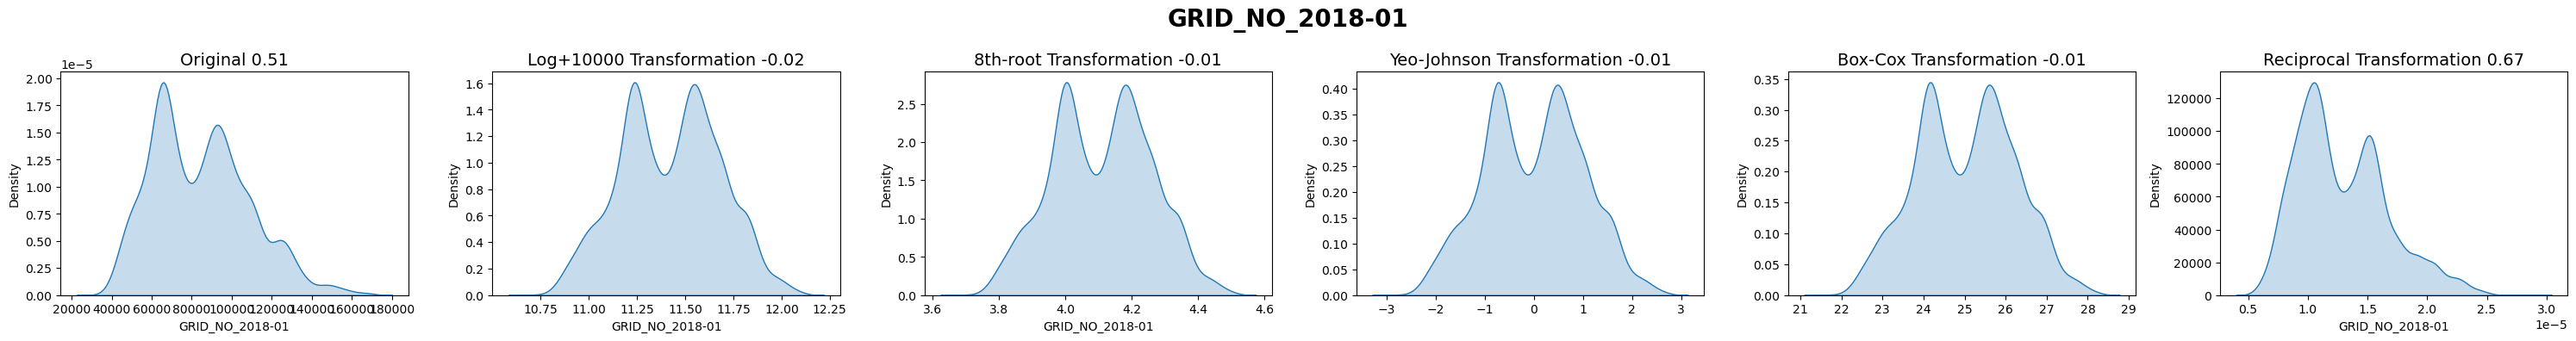

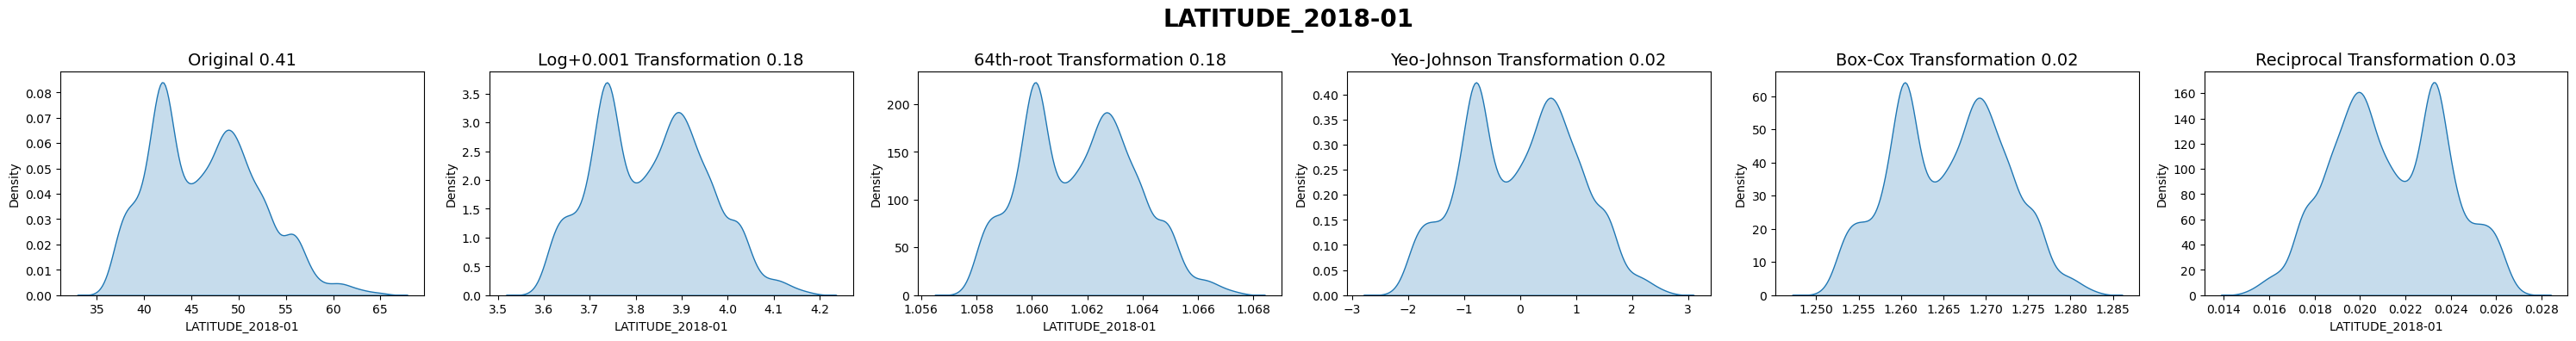

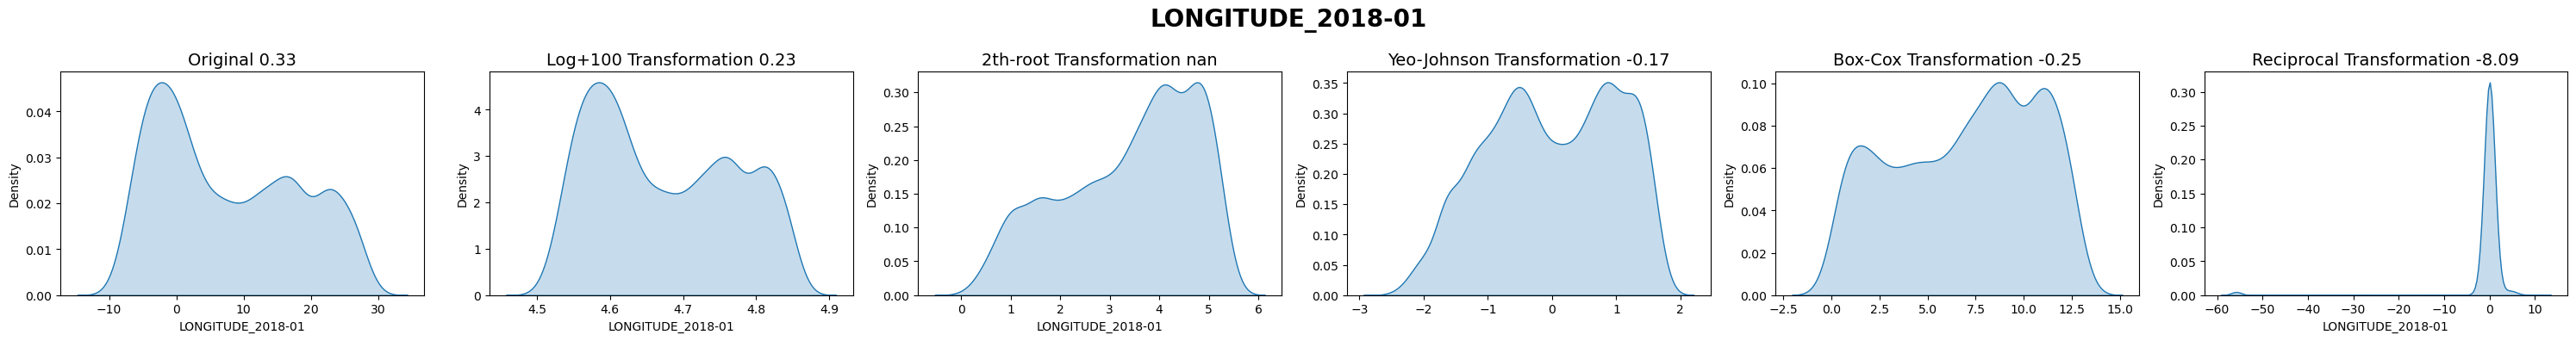

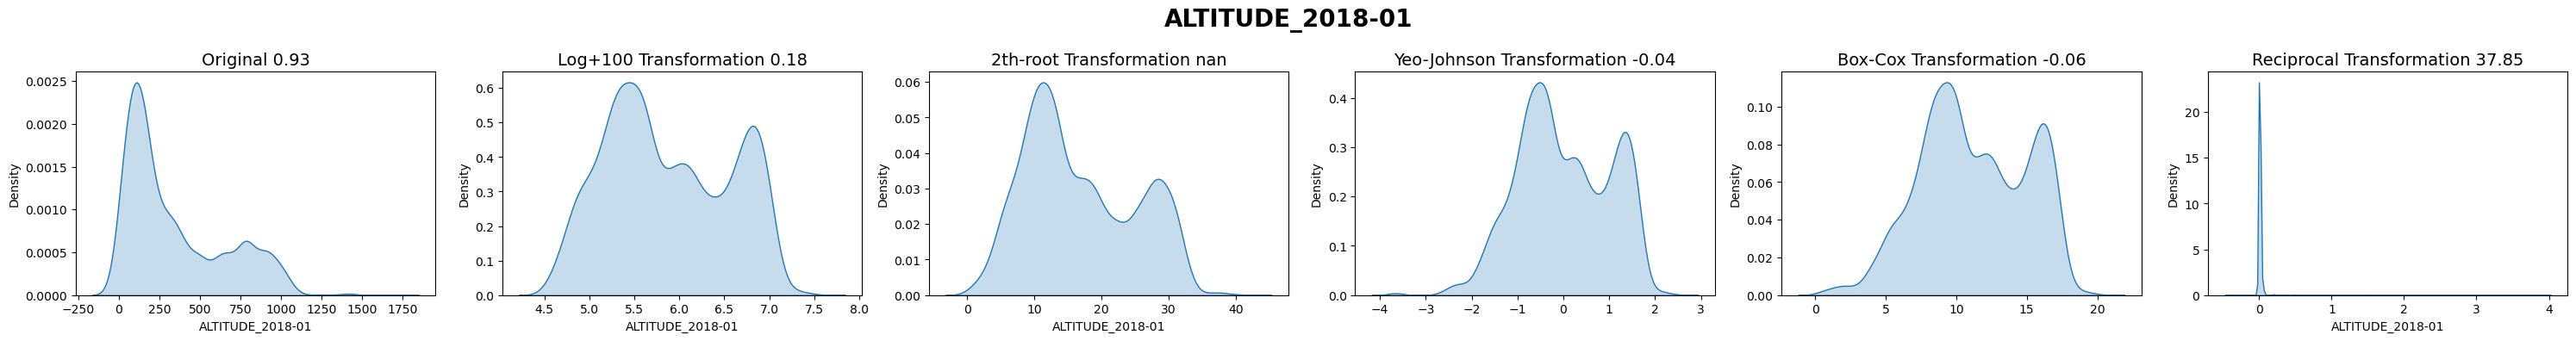

/var/folders/v6/m8bc43ln77365fv_xpkw2y7m0000gq/T/ipykernel_1232/4112476520.py:18: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(X_train[attr], fill=True, ax=ax[0])
/var/folders/v6/m8bc43ln77365fv_xpkw2y7m0000gq/T/ipykernel_1232/4112476520.py:49: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(yeo_trans, fill=True, ax=ax[3])
/var/folders/v6/m8bc43ln77365fv_xpkw2y7m0000gq/T/ipykernel_1232/4112476520.py:66: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(reciprocal_trans, fill=True, ax=ax[5])


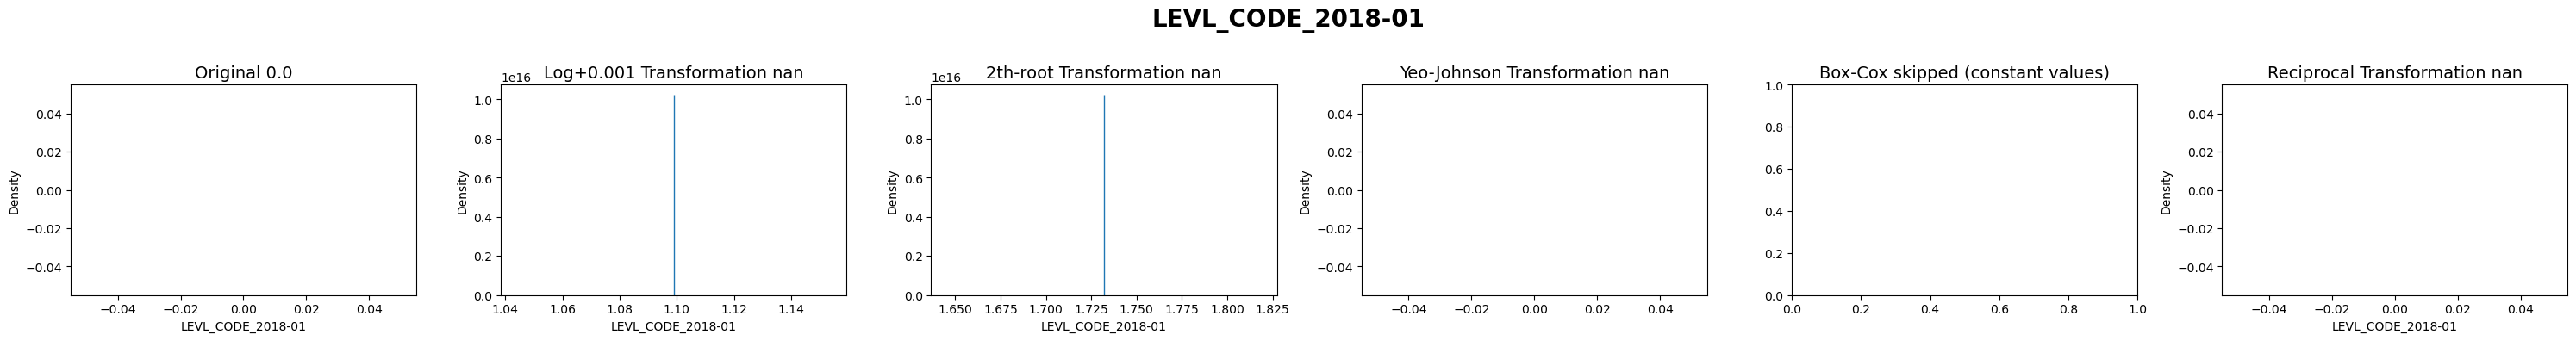

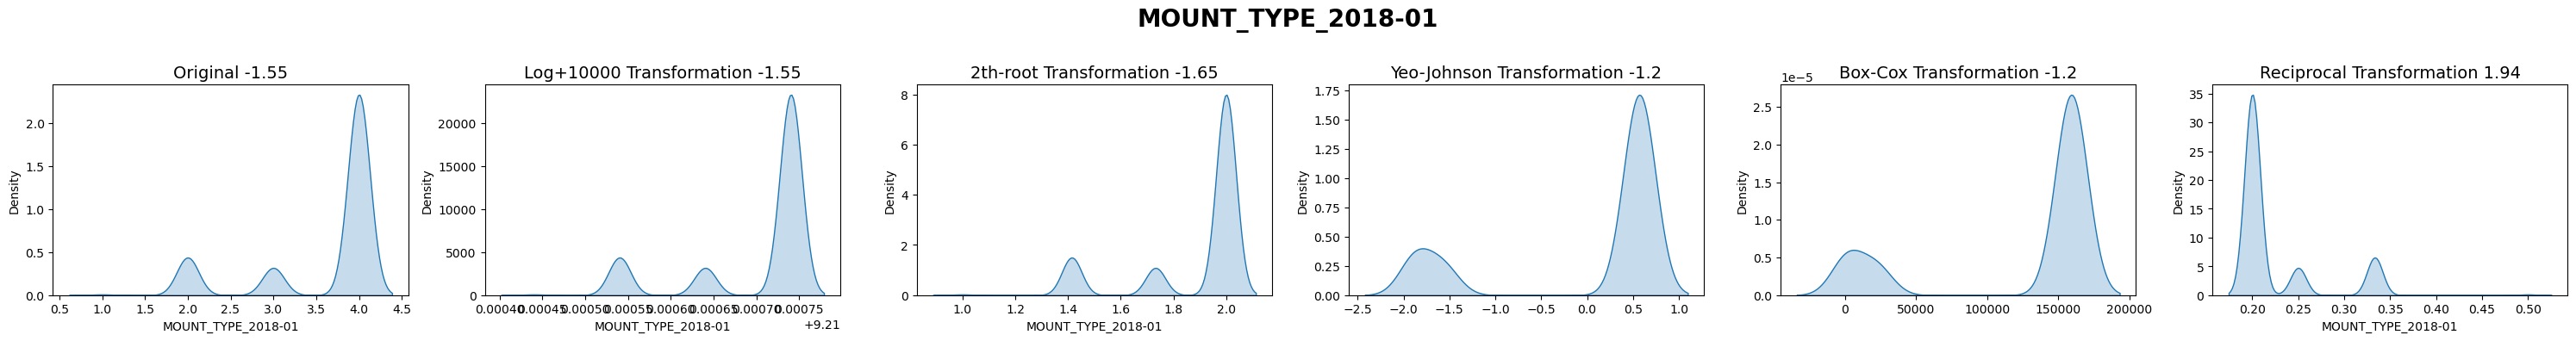

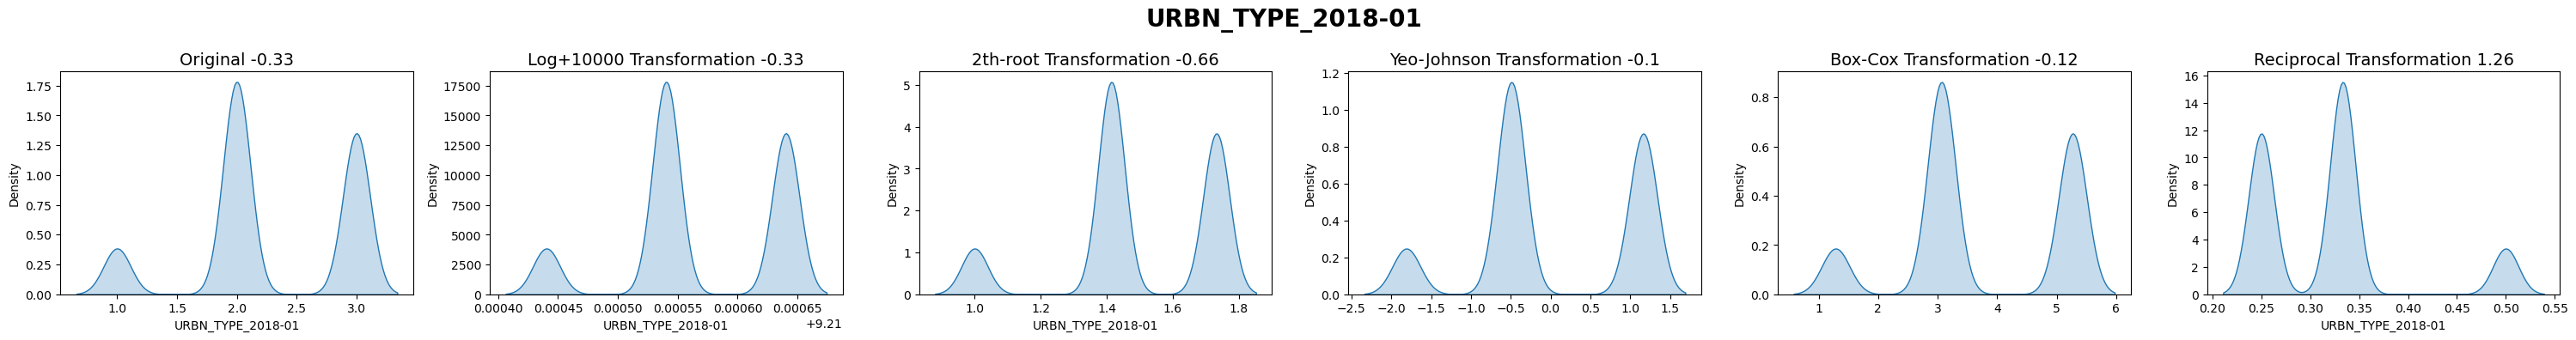

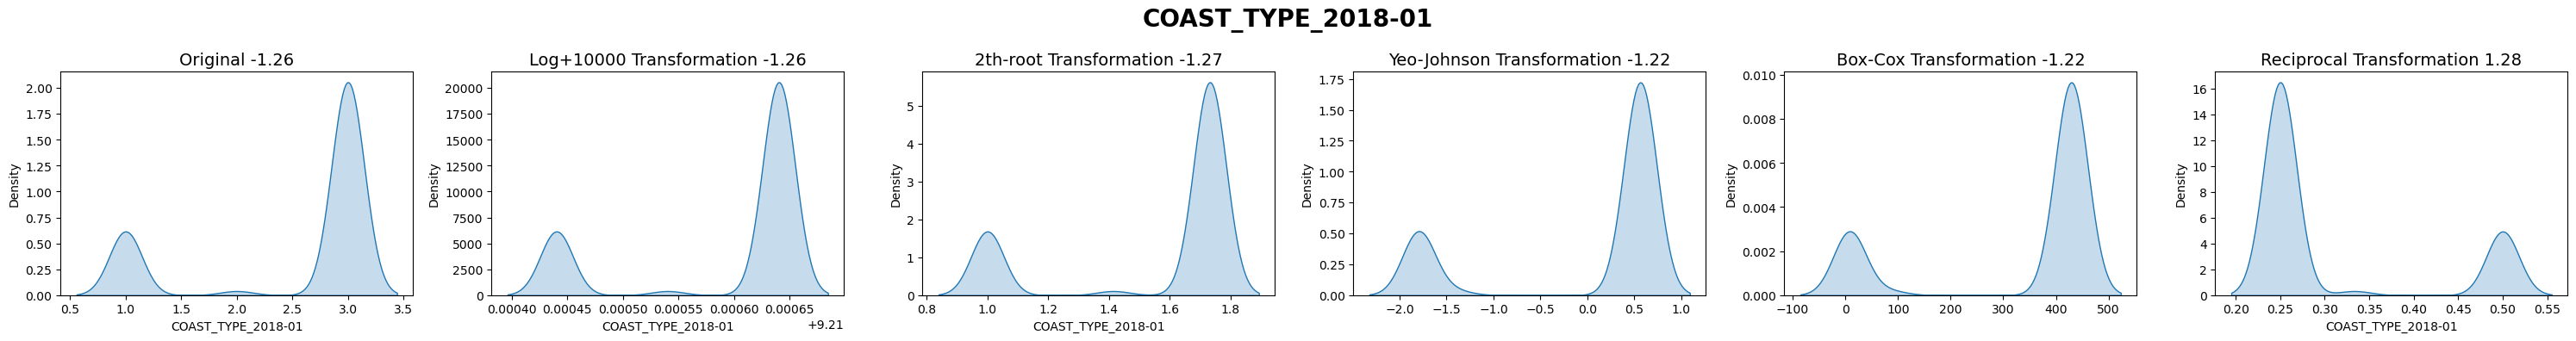

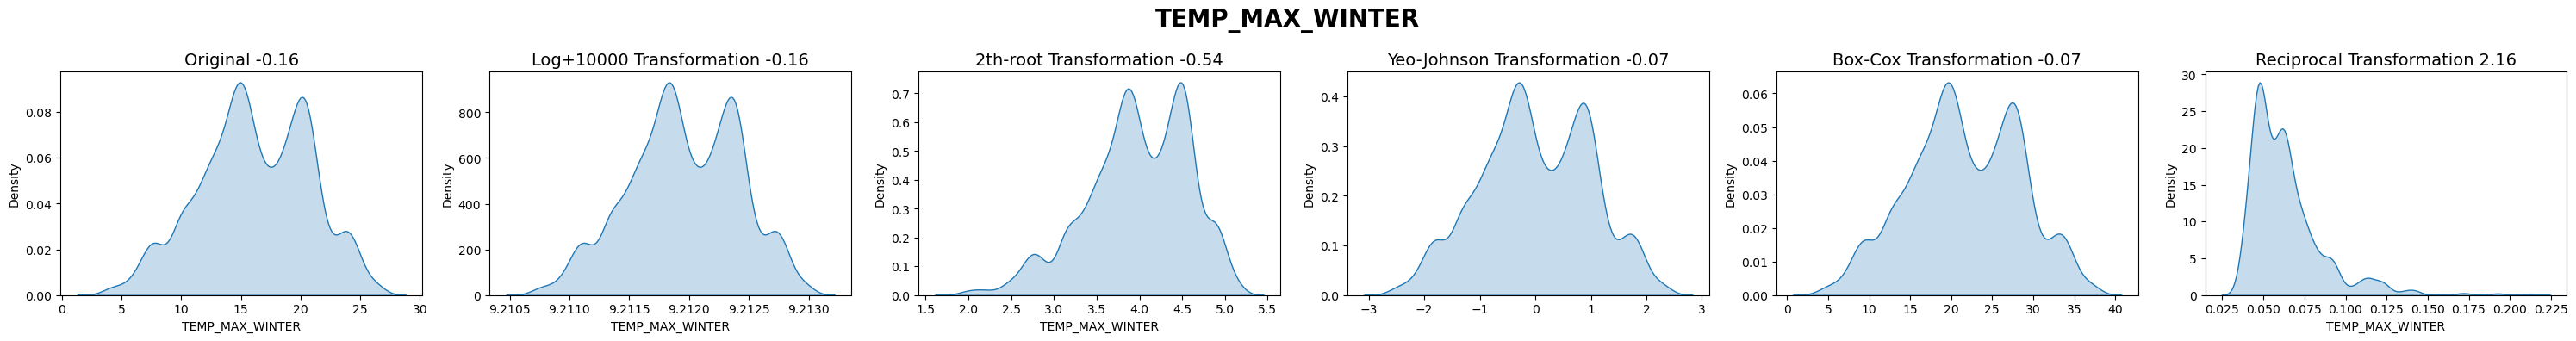

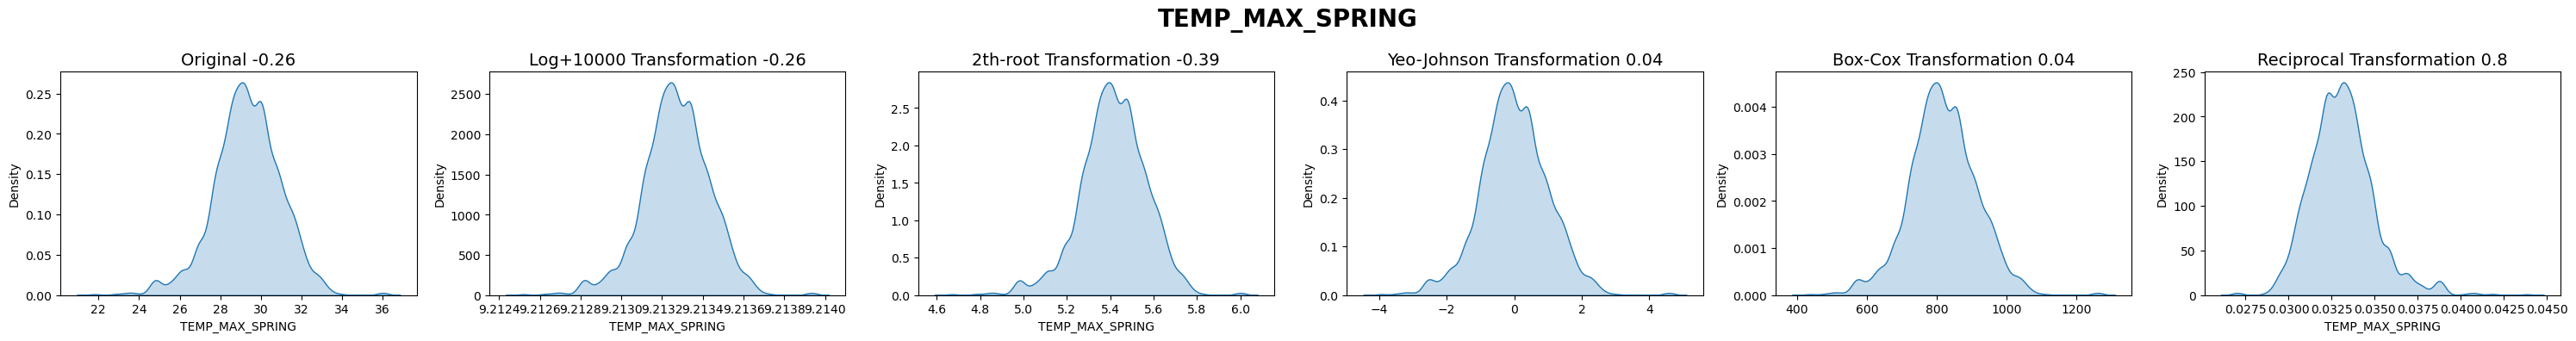

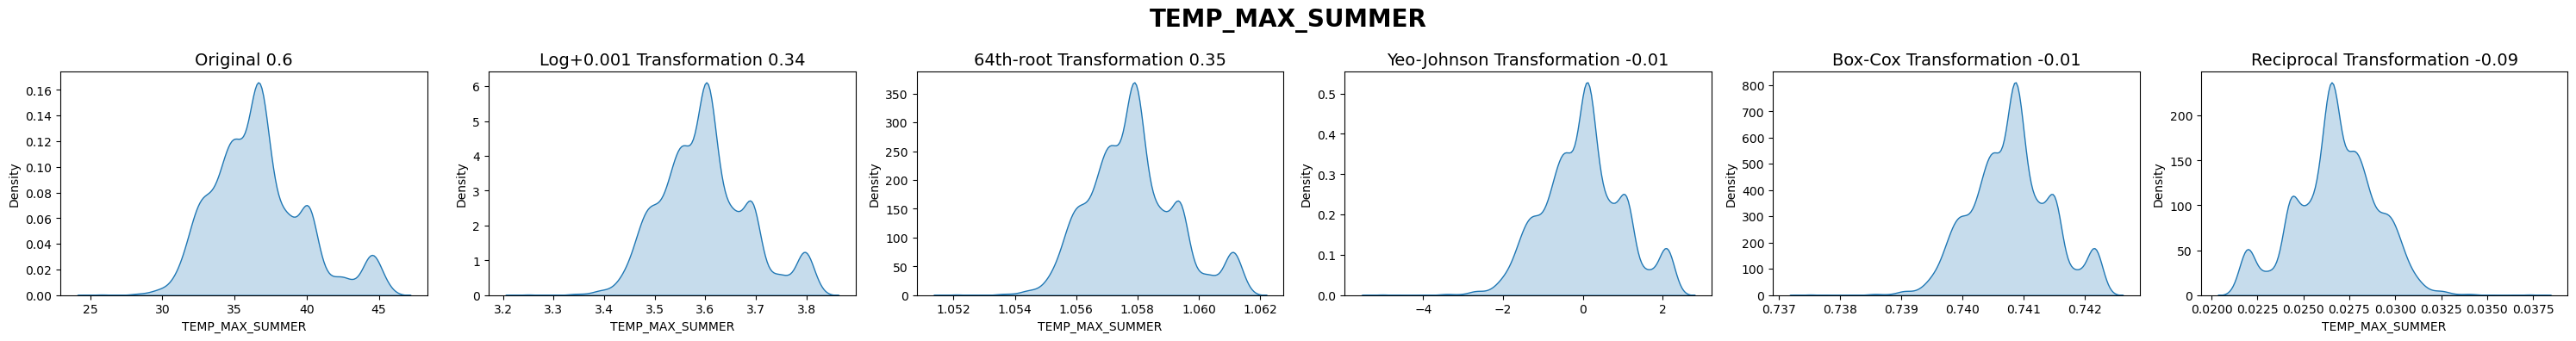

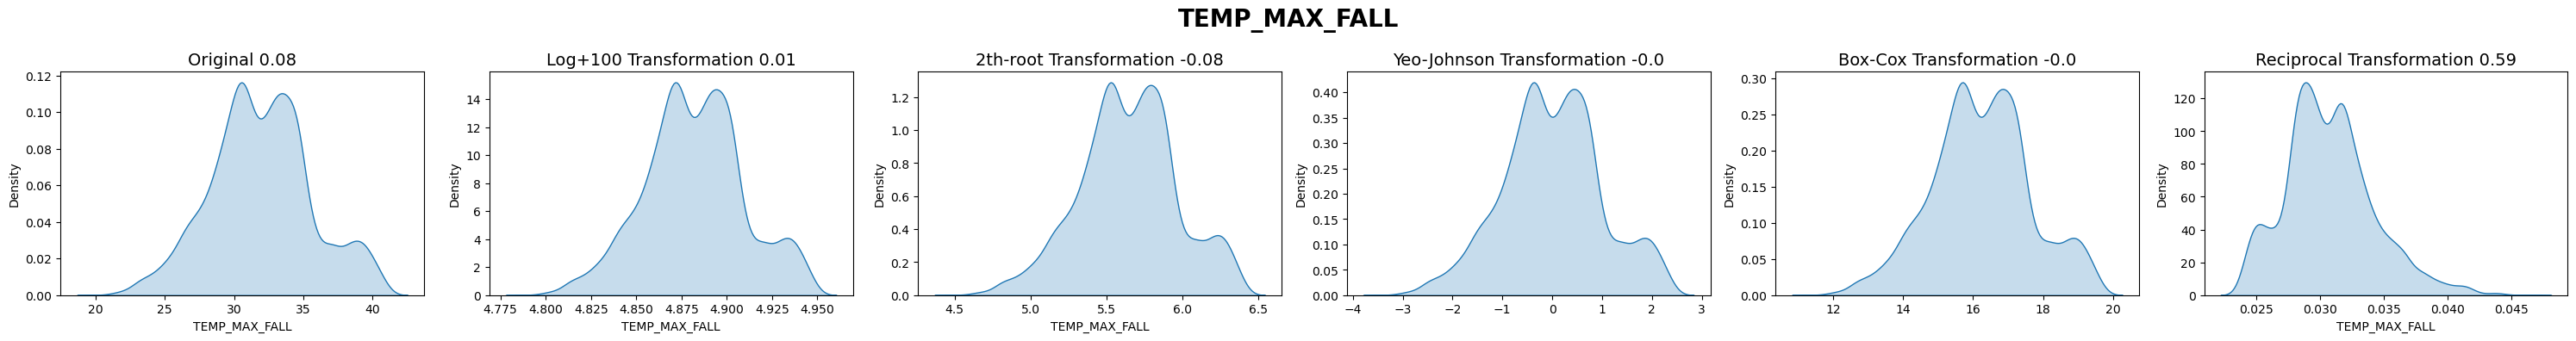

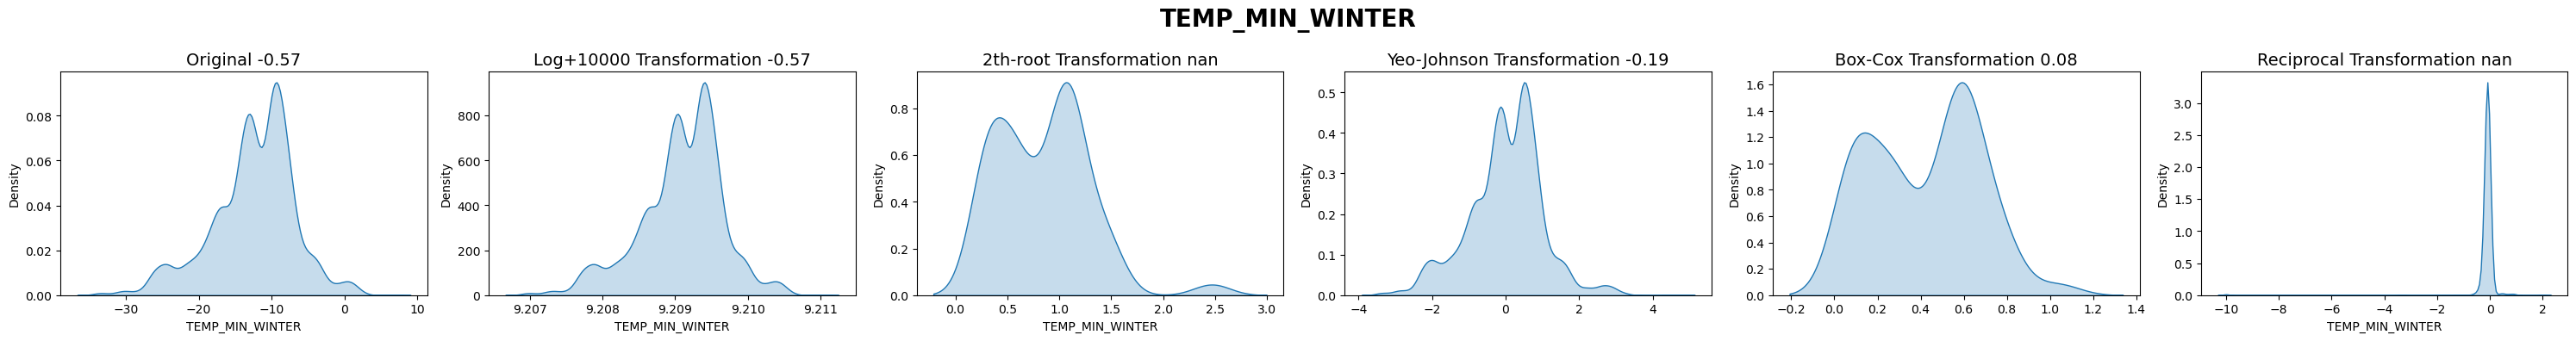

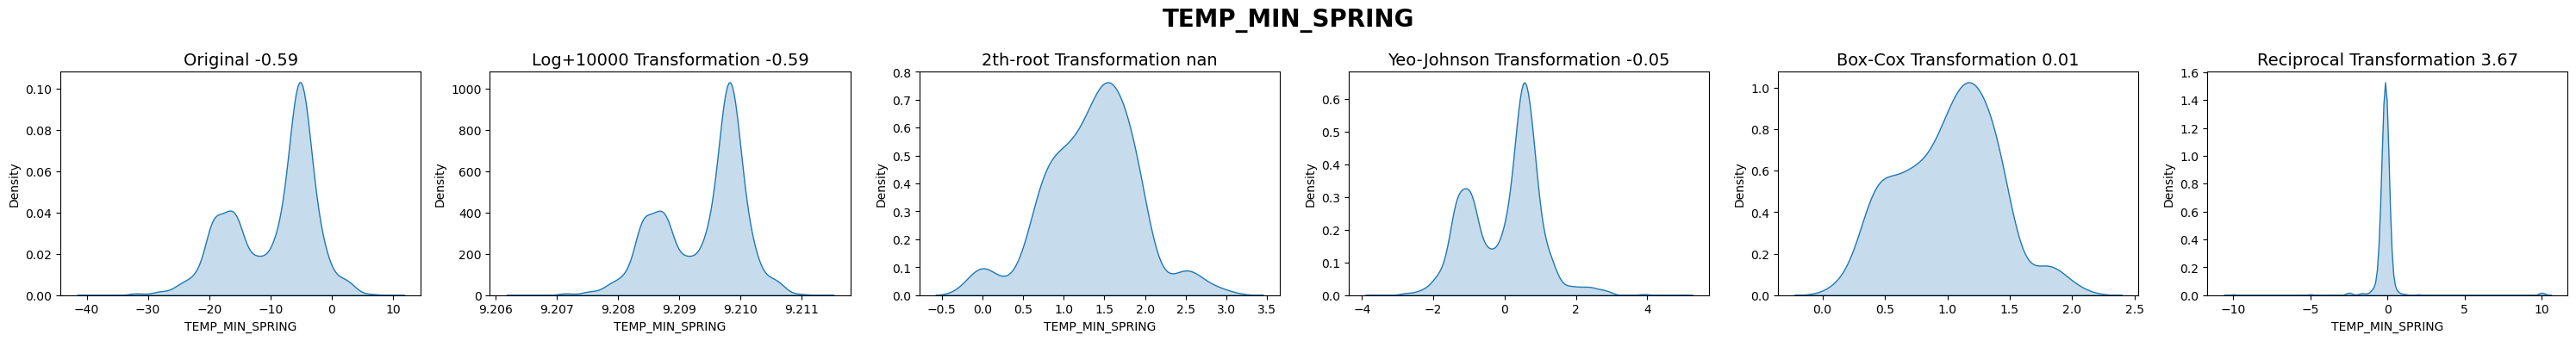

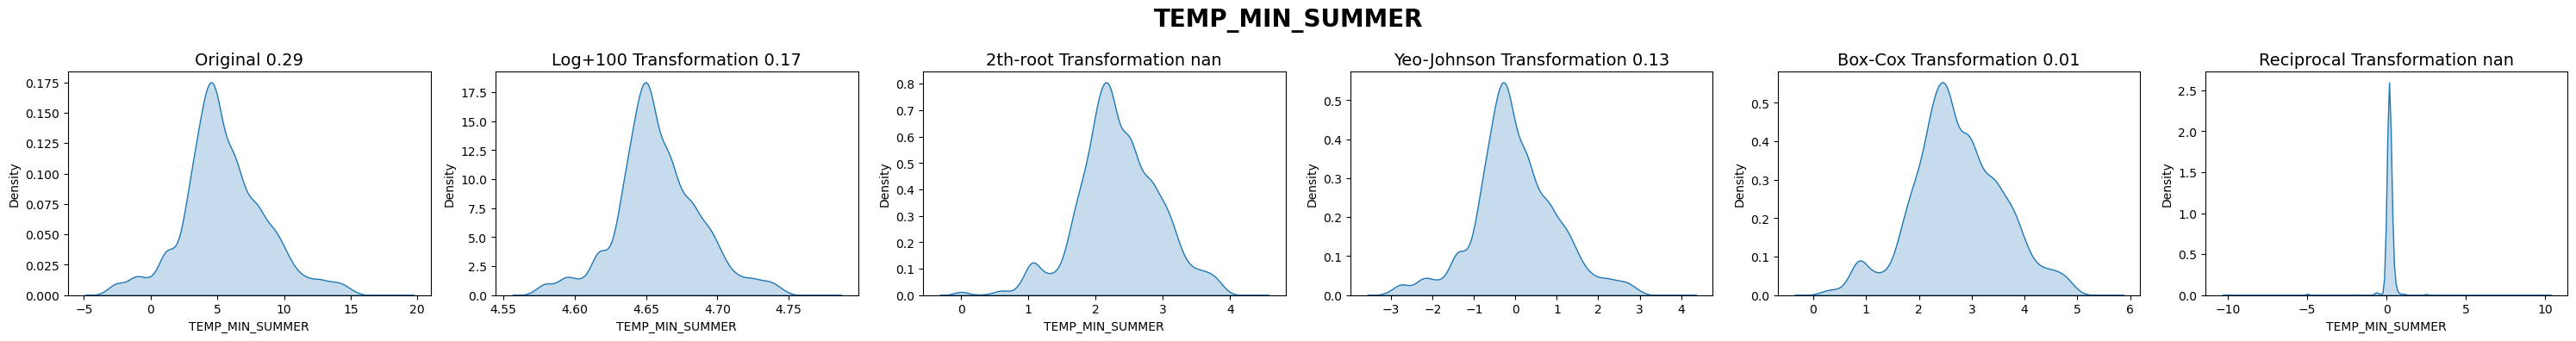

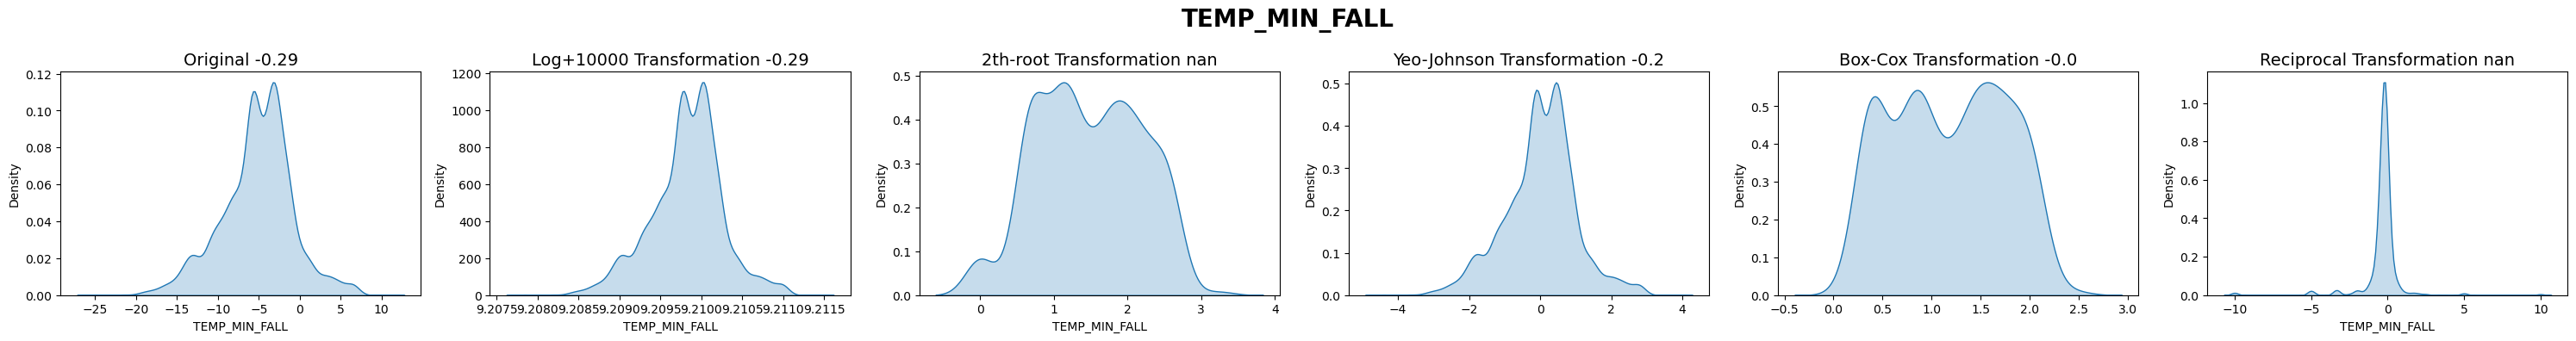

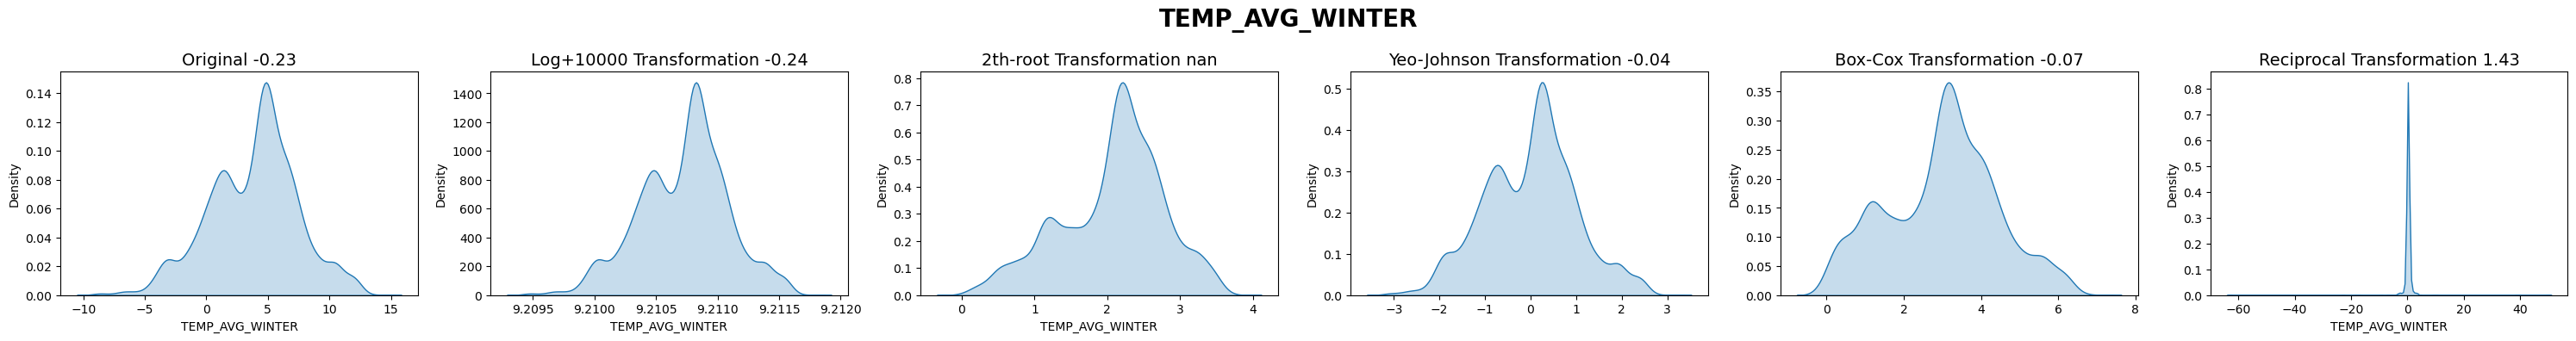

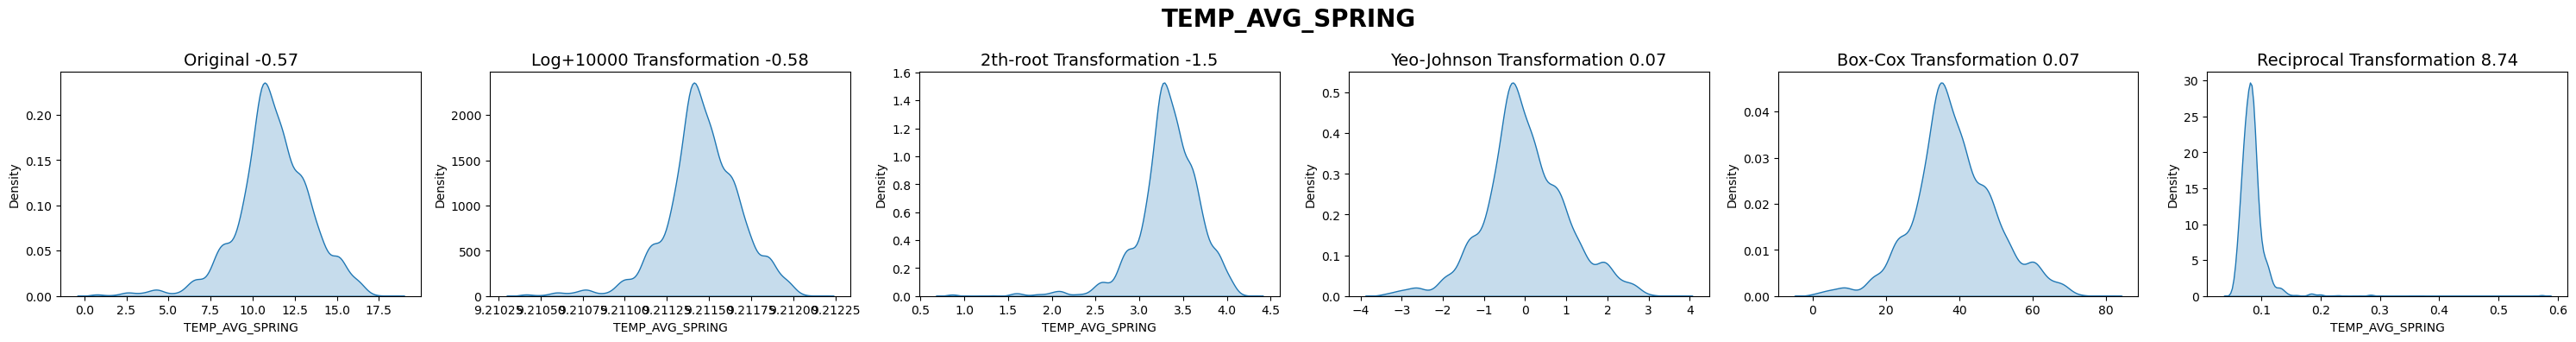

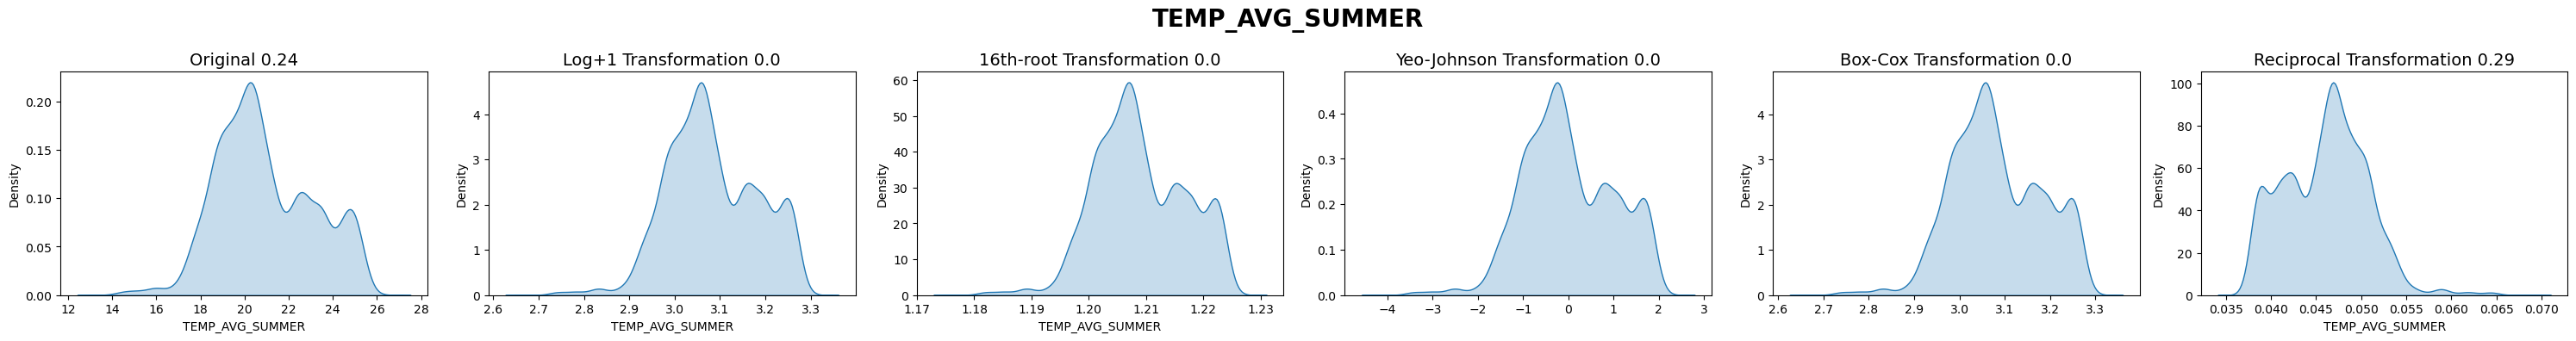

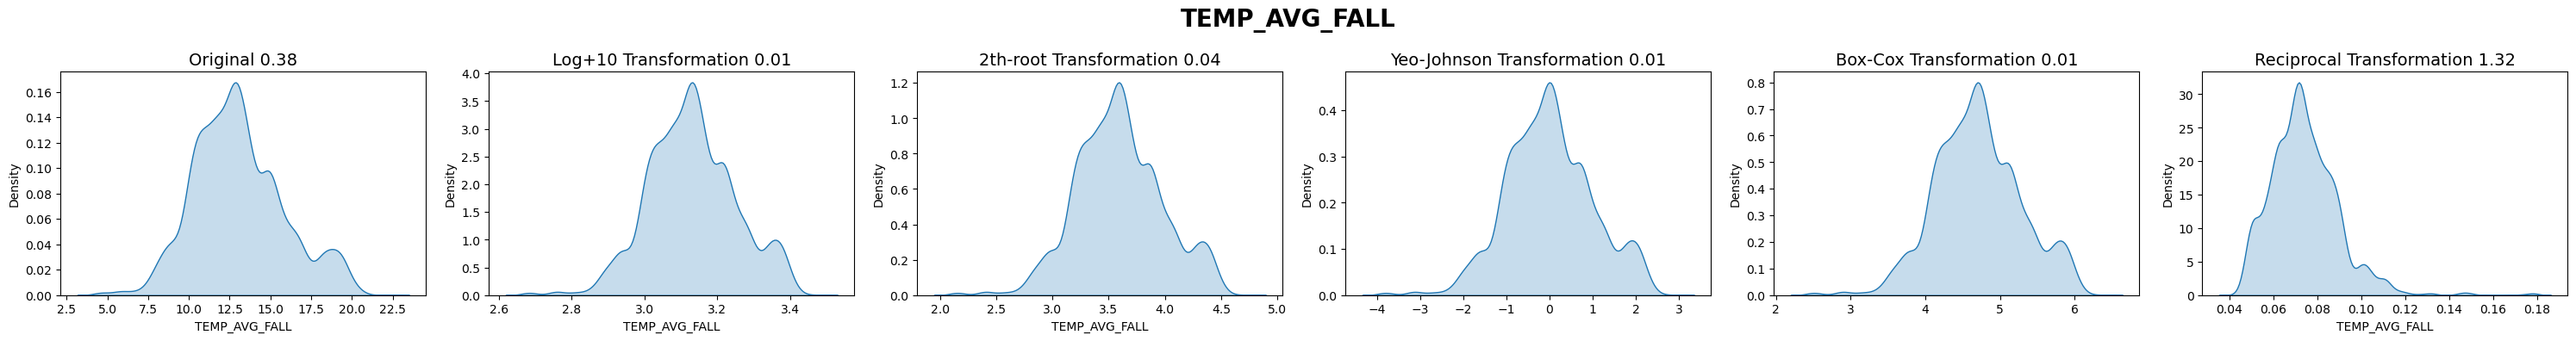

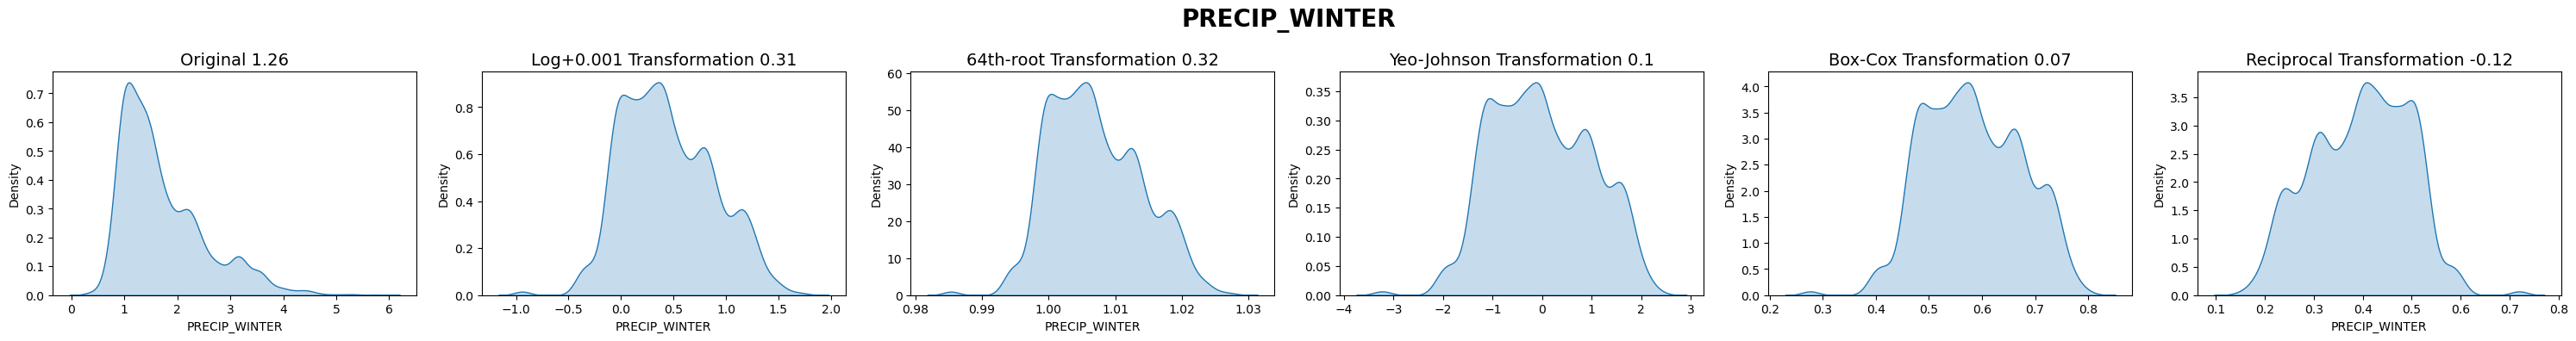

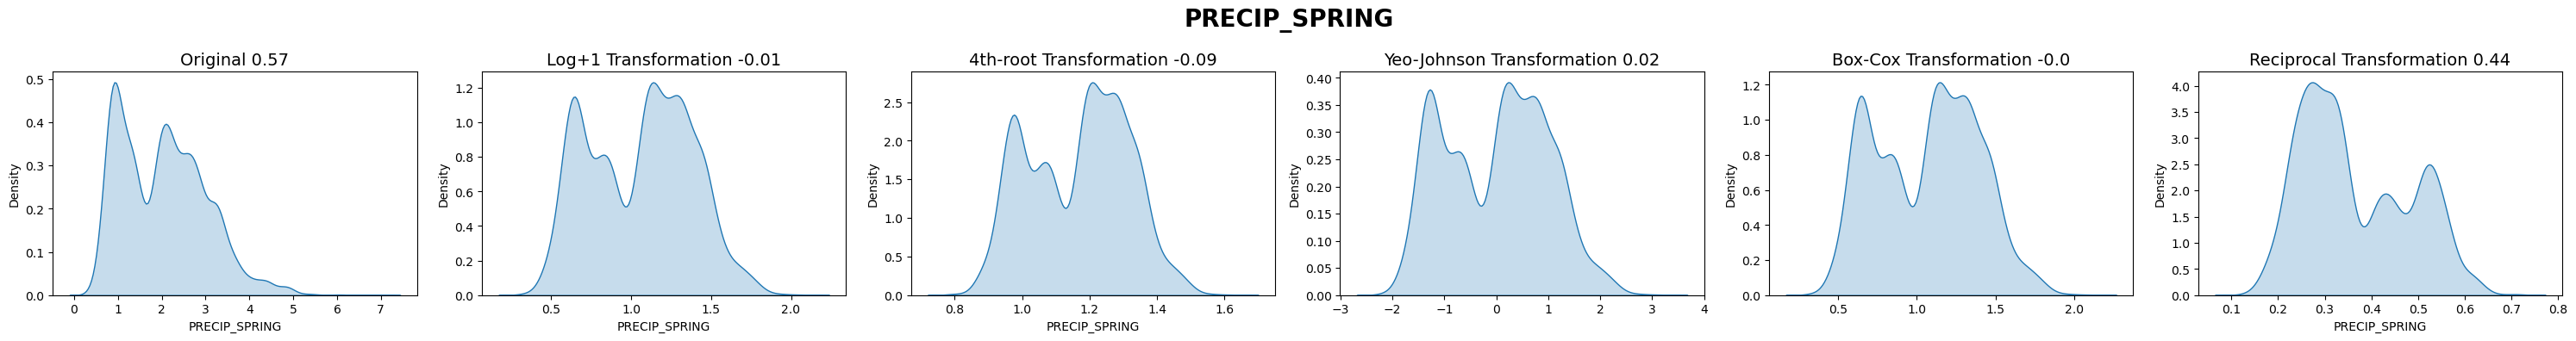

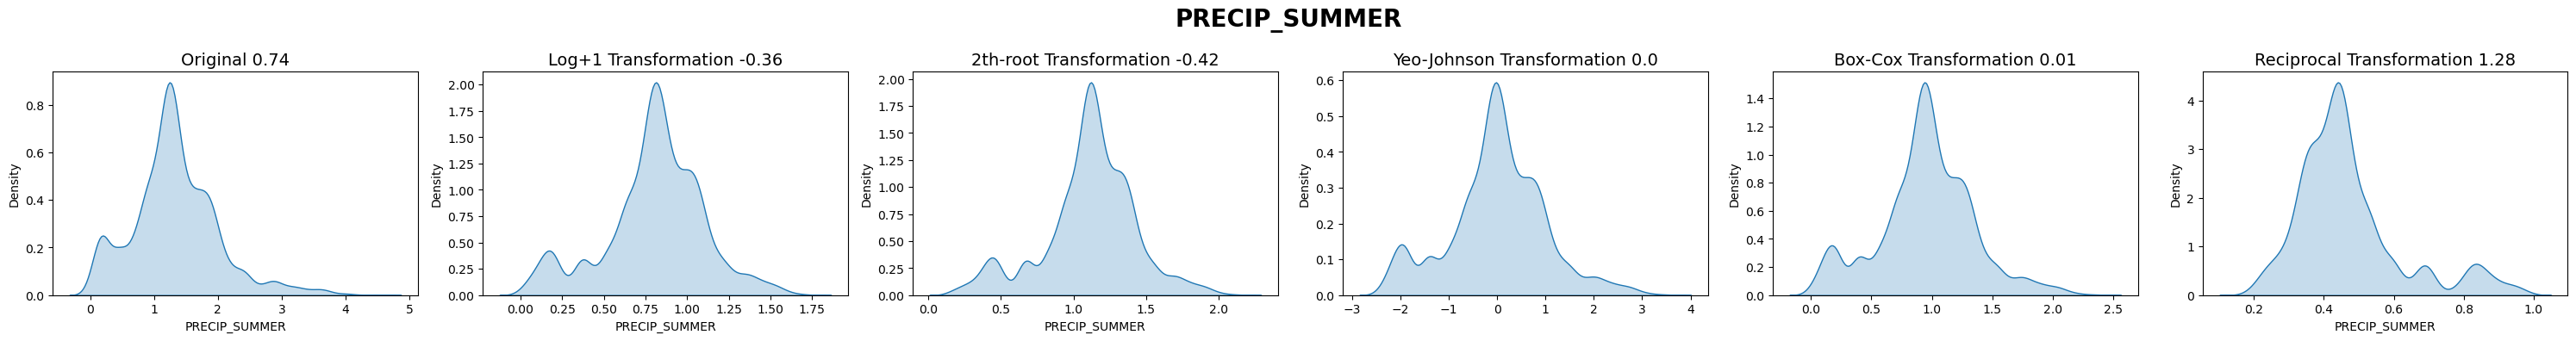

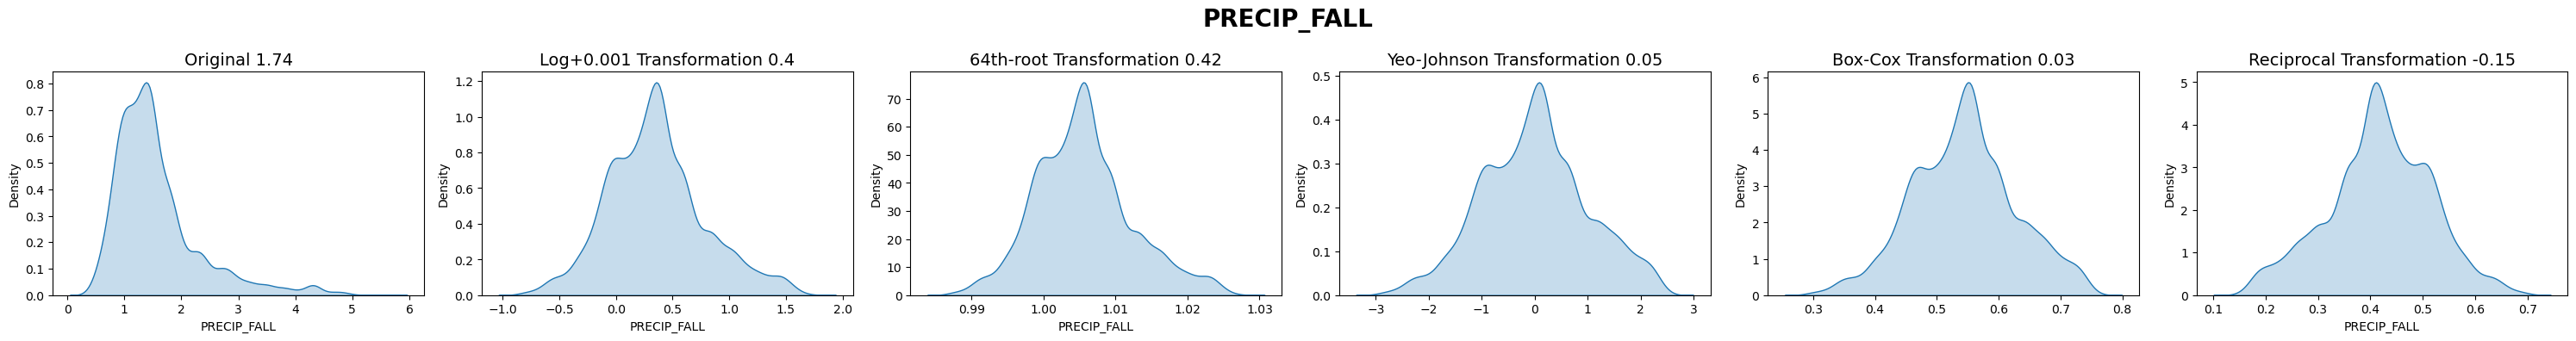

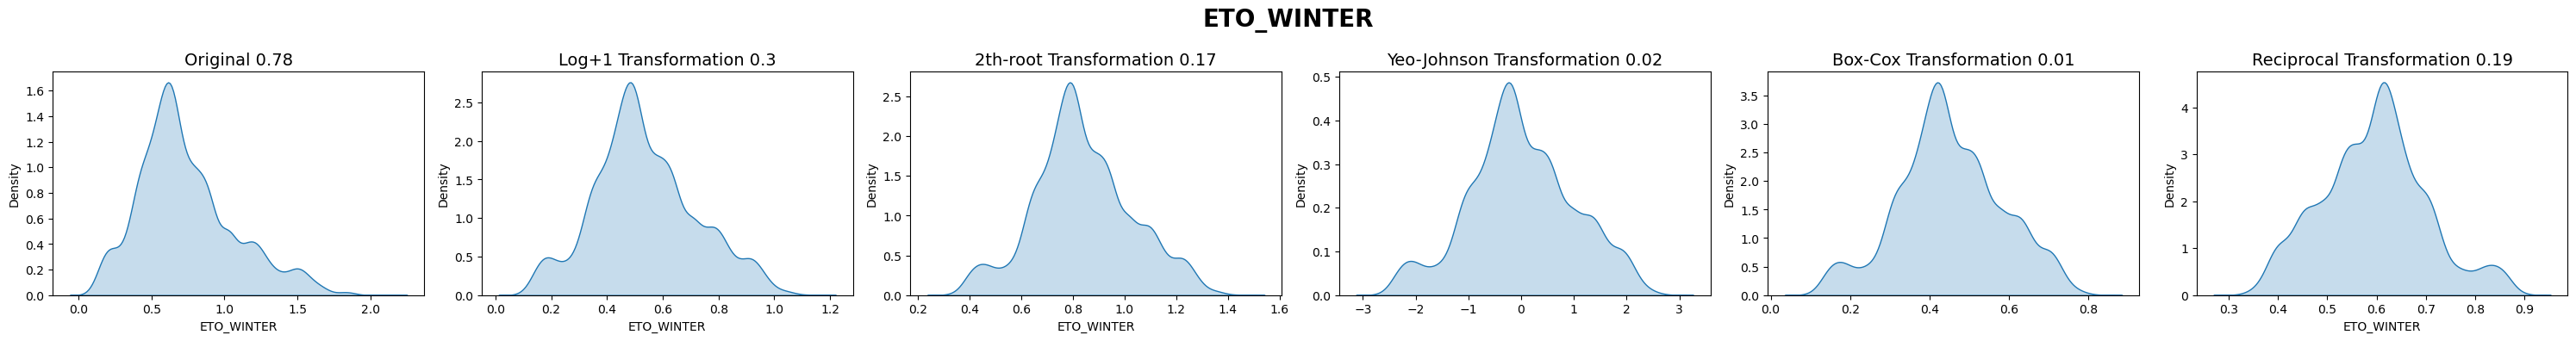

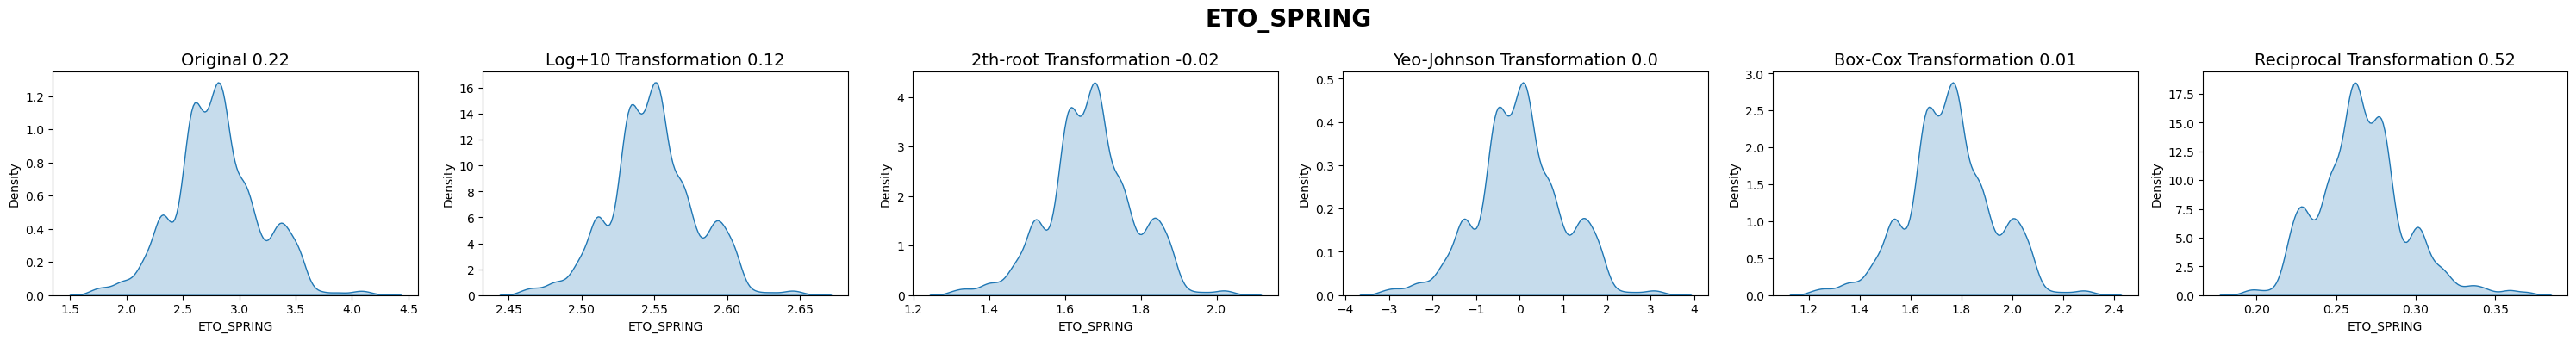

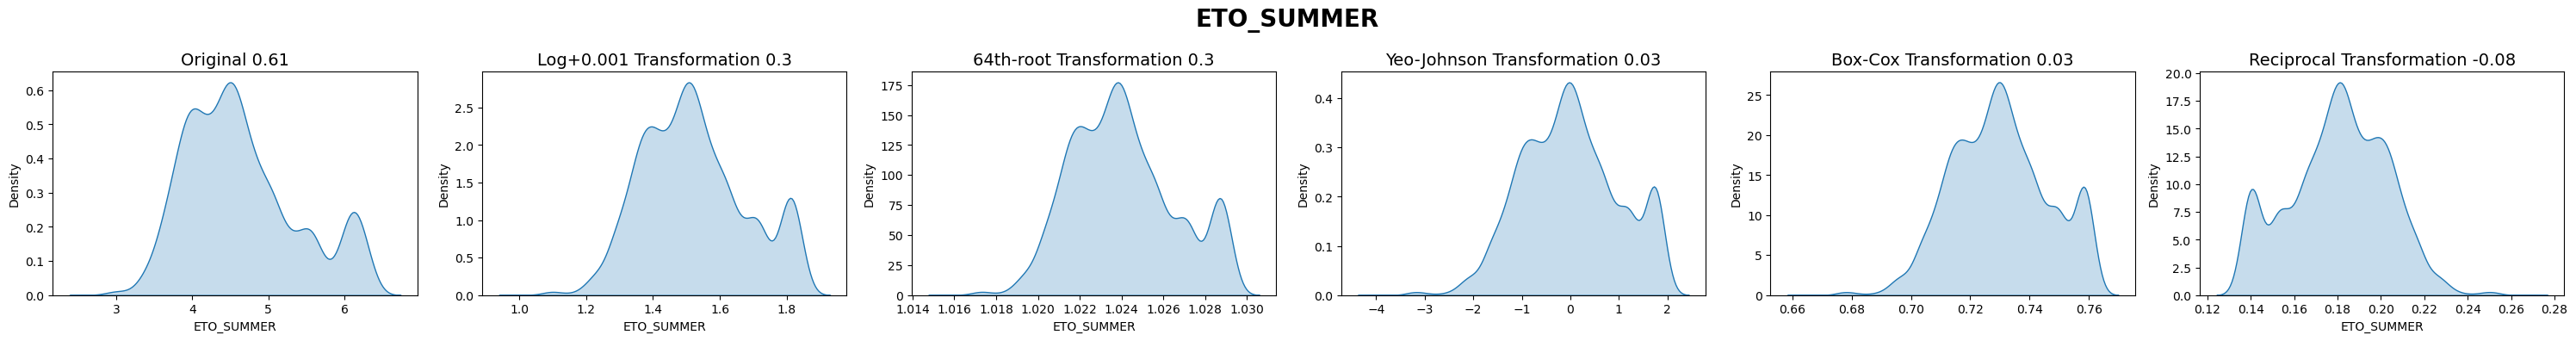

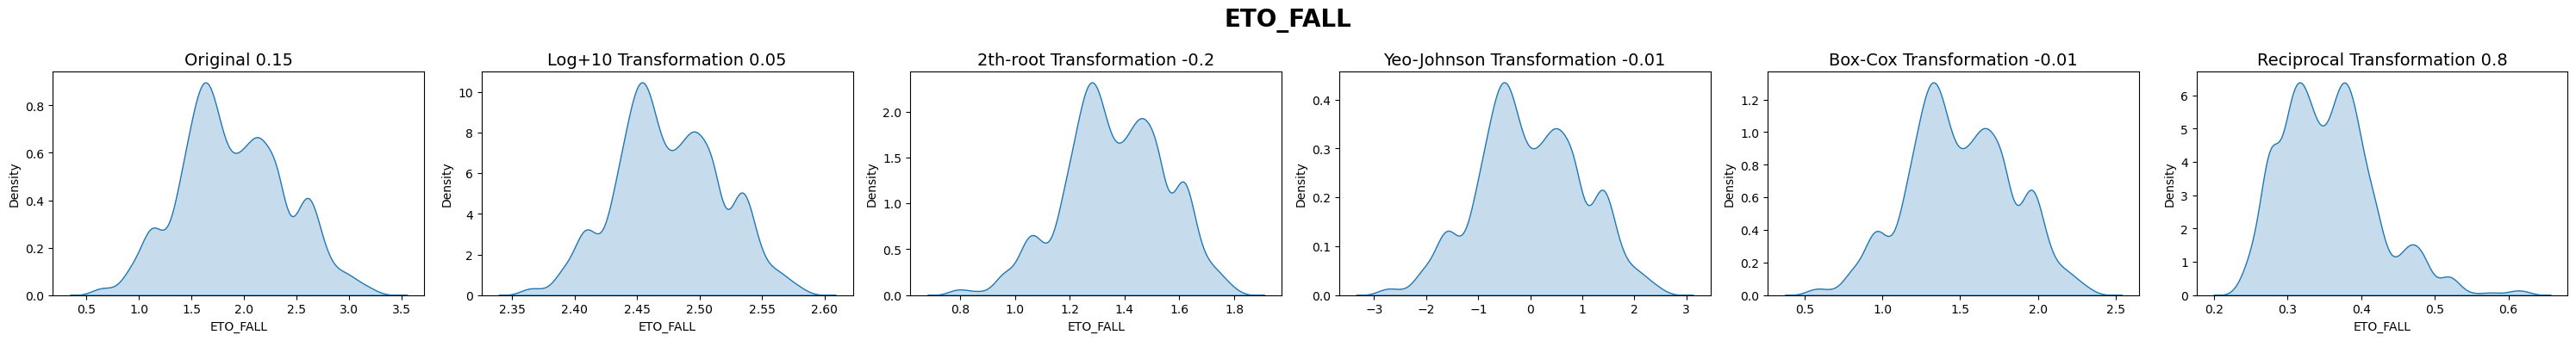

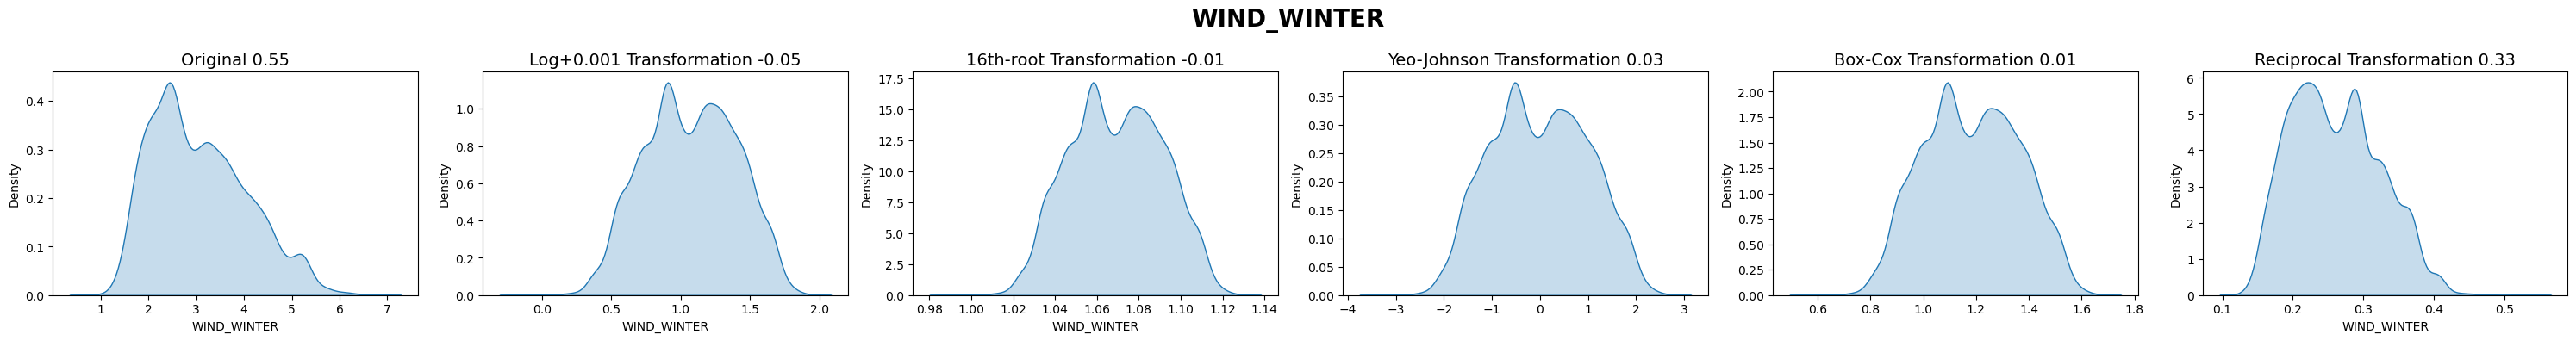

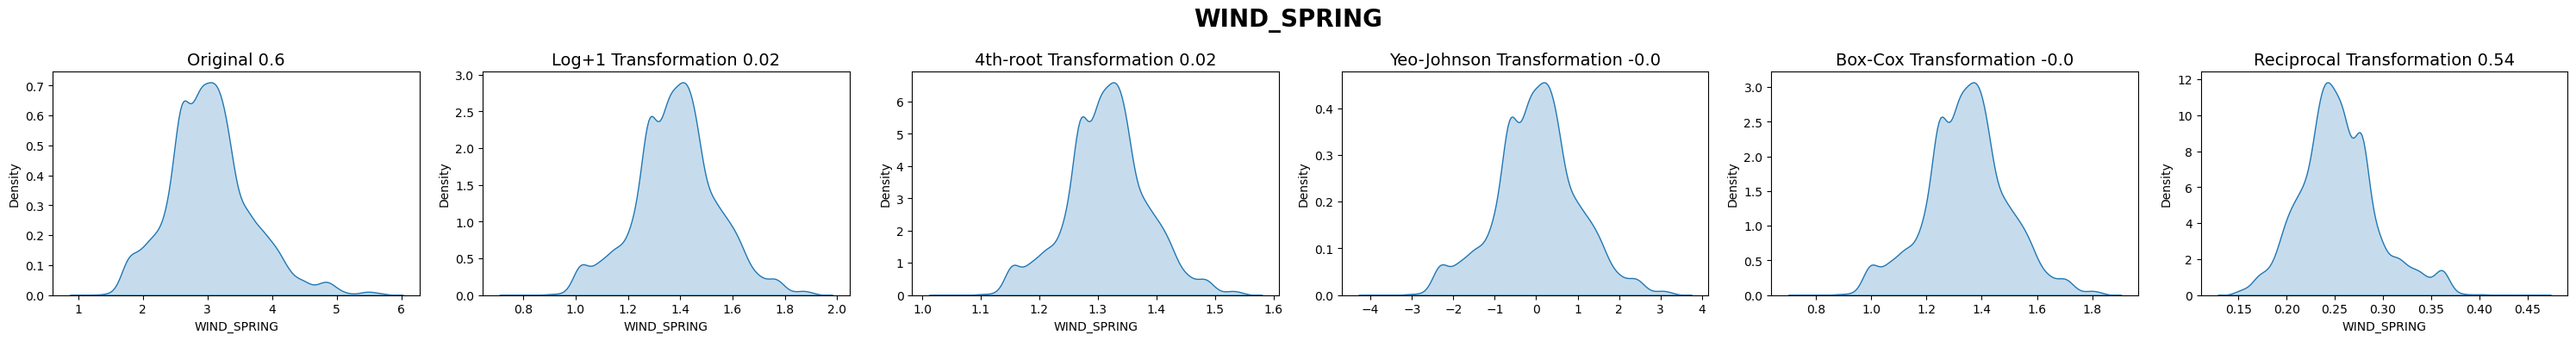

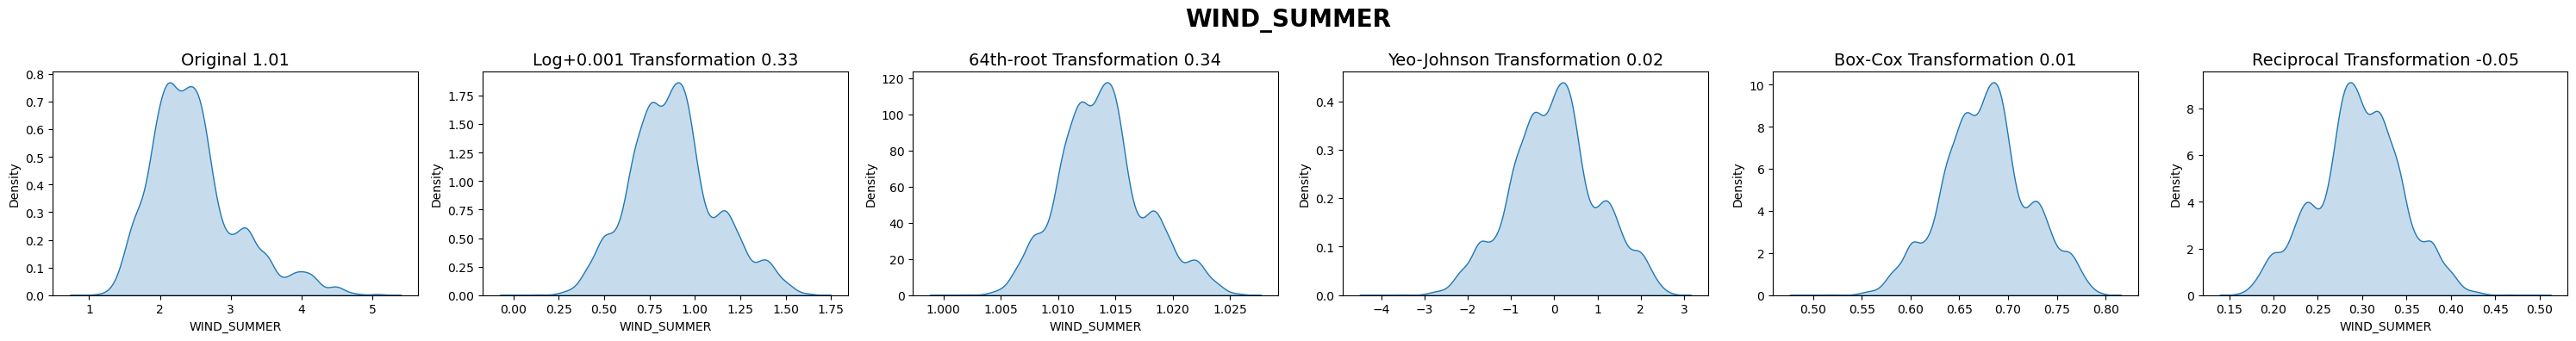

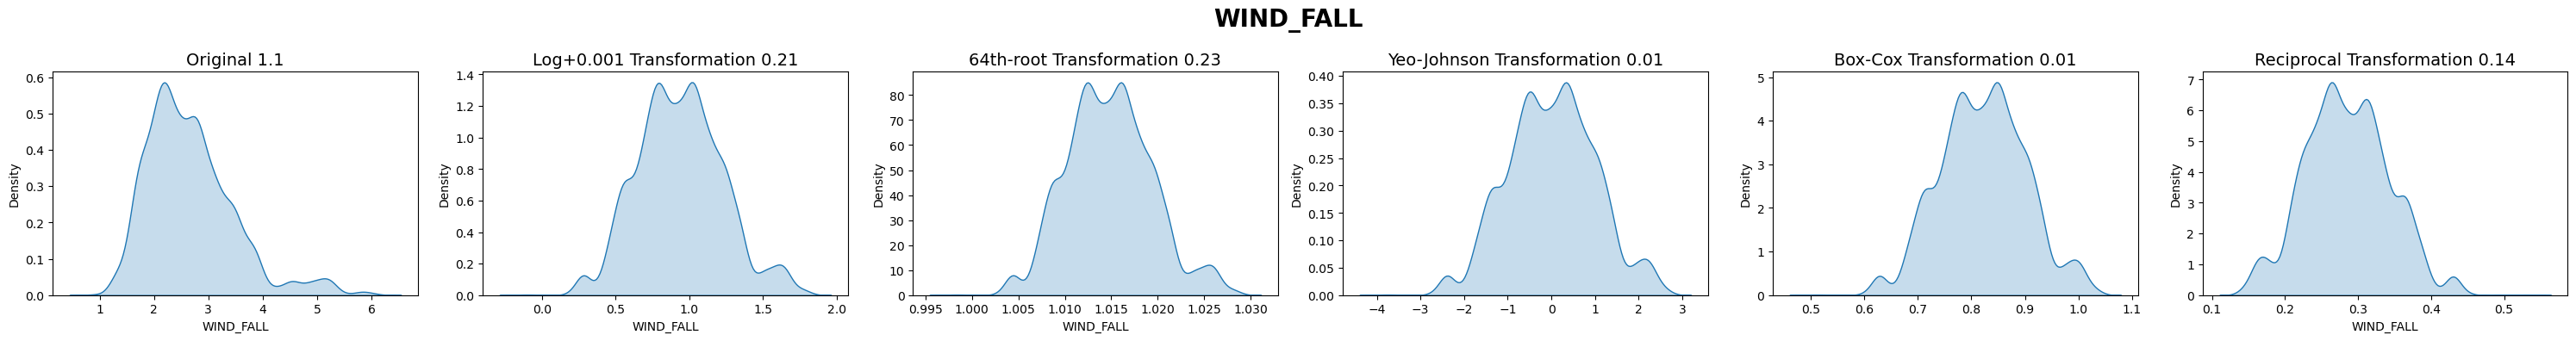

In [150]:
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)



for attr in X_num_col:
    fig, ax = plt.subplots(1, 6, figsize=(30, 4))

    skf = X_train[attr].skew().round(2)
    sns.kdeplot(X_train[attr], fill=True, ax=ax[0])
    ax[0].set_title(f'Original {skf}', fontsize=14)

    # Log transformation
    gridsv, x, skf = [0.001, 1, 10, 100, 1000, 10000], 0.001, 200
    for i in gridsv:
        n_skf = skew(np.log(i + X_train[attr]))
        if abs(n_skf) < abs(skf):
            x, skf = i, n_skf

    log_trans = np.log(x + X_train[attr])
    skf = round(skew(log_trans), 2)
    sns.kdeplot(log_trans, fill=True, ax=ax[1])
    ax[1].set_title(f'Log+{x} Transformation {skf}', fontsize=14)

    # Root transformation
    gridsv, x, skf = [1/2, 1/4, 1/8, 1/16, 1/32, 1/64], 1/2, 200
    for i in gridsv:
        n_skf = skew(np.power(X_train[attr], i))
        if abs(n_skf) < abs(skf):
            x, skf = i, n_skf

    root_trans = np.power(X_train[attr], x)
    skf = round(skew(root_trans), 2)
    sns.kdeplot(root_trans, fill=True, ax=ax[2])
    ax[2].set_title(f'{int(1/x)}th-root Transformation {skf}', fontsize=14)

    # Yeo-Johnson transformation
    transformer = PowerTransformer(method='yeo-johnson')
    yeo_trans = transformer.fit_transform(X_train[[attr]] + 1)[:, 0]
    skf = round(skew(yeo_trans), 2)
    sns.kdeplot(yeo_trans, fill=True, ax=ax[3])
    ax[3].set_title(f'Yeo-Johnson Transformation {skf}', fontsize=14)

    # Box-Cox transformation
    positive_data = X_train[attr][X_train[attr] > 0] + 1
    if positive_data.nunique() > 1:
        boxcox_trans, _ = boxcox(positive_data)
        skf = round(skew(boxcox_trans), 2)
        sns.kdeplot(boxcox_trans, fill=True, ax=ax[4])
        ax[4].set_title(f'Box-Cox Transformation {skf}', fontsize=14)
    else:
        ax[4].set_title('Box-Cox skipped (constant values)', fontsize=14)


    # Reciprocal transformation
    reciprocal_trans = 1 / (X_train[attr] + 1)
    skf = round(skew(reciprocal_trans), 2)
    sns.kdeplot(reciprocal_trans, fill=True, ax=ax[5])
    ax[5].set_title(f'Reciprocal Transformation {skf}', fontsize=14)

    plt.suptitle(attr, fontsize=20, weight='bold')
    plt.tight_layout(pad=1.1)
    plt.show()

In [242]:
boxcox_lambdas = {}
yeo_cols = []

for col in X_num_col:
    if (X_train[col] > 0).all():  
        if X_train[col].nunique() > 1:  
            X_train[col], fitted_lambda = boxcox(X_train[col])
            X_test[col] = boxcox(X_test[col], lmbda=fitted_lambda)
        else:
            print(f"Column {col} has constant values. Applying Yeo-Johnson instead.")
            yeo_cols.append(col)  
    else:
        yeo_cols.append(col)  

print("Columns for Yeo-Johnson Transformation:", yeo_cols)

pt = PowerTransformer(method='yeo-johnson')
X_train[yeo_cols] = pt.fit_transform(X_train[yeo_cols])
X_test[yeo_cols] = pt.transform(X_test[yeo_cols]) 


Column LEVL_CODE_2018-01 has constant values. Applying Yeo-Johnson instead.
Columns for Yeo-Johnson Transformation: ['OC', 'P', 'N', 'K', 'Elev', 'LONGITUDE_2018-01', 'ALTITUDE_2018-01', 'LEVL_CODE_2018-01', 'TEMP_MIN_WINTER', 'TEMP_MIN_SPRING', 'TEMP_MIN_SUMMER', 'TEMP_MIN_FALL', 'TEMP_AVG_WINTER']


After splitting the data and applying the respective power transformaitions, I am using SMOTE to syntethically generate more datapoints for the minority classes.

In [245]:
smote = SMOTE(random_state=42)  
X_train, y_train = smote.fit_resample(X_train, y_train)


print("\nAfter SMOTE Resampling:")
print(X_train.shape, y_train.shape)


from collections import Counter
print("Class distribution after resampling:", Counter(y_train))


After SMOTE Resampling:
(22788, 798) (22788,)
Class distribution after resampling: Counter({'Fruit & Perennial': 3798, 'Cereal': 3798, 'Legume': 3798, 'Oilseed': 3798, 'Root & Tuber': 3798, 'Vegetable': 3798})


In [247]:
print(y_train.dtype)
print(y_train.unique())


object
['Fruit & Perennial' 'Cereal' 'Legume' 'Oilseed' 'Root & Tuber'
 'Vegetable']


In [250]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [105]:
#Running some baseline models without hyperparameter tuning


classifiers = {
    
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'SGDClassifier':SGDClassifier(random_state = 42),
    'LinearSVC':LinearSVC(random_state = 42, max_iter = 10000),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state = 42),
    'ExtraTreeClassifier': ExtraTreeClassifier(random_state = 42),
    'GradientBoostingClassifier':GradientBoostingClassifier(random_state = 42),
    'RandomForestClassifier': RandomForestClassifier(random_state = 42),
    'ExtraTreesClassifier': ExtraTreesClassifier(random_state = 42),
    'CatBoostClassifier':CatBoostClassifier(random_state = 42, verbose=False),
    'LGBMClassifier':LGBMClassifier(random_state = 42, verbose=0),
    'AdaBoostClassifier': AdaBoostClassifier(algorithm="SAMME", random_state=42),
    'MLPClassifier': MLPClassifier(alpha=1, max_iter=1000, random_state=42),


}

In [435]:
test_scores = dict()
train_scores = dict()

for clr in classifiers.keys():
    print(f'{clr}:')

    classifiers[clr].fit(X_train, y_train)

    y_train_pred = classifiers[clr].predict(X_train)
    train_score = {
        'recall': recall_score(y_train, y_train_pred, average='macro', zero_division=0),
        'precision': precision_score(y_train, y_train_pred, average='macro', zero_division=0),
        'accuracy': accuracy_score(y_train, y_train_pred),
        'balanced_accuracy': balanced_accuracy_score(y_train, y_train_pred),  
        'f1_score': f1_score(y_train, y_train_pred, average='macro', zero_division=0),
    }
    train_scores[clr] = train_score

    y_test_pred = classifiers[clr].predict(X_test)
    test_score = {
        'recall': recall_score(y_test, y_test_pred, average='macro', zero_division=0),
        'precision': precision_score(y_test, y_test_pred, average='macro', zero_division=0),
        'accuracy': accuracy_score(y_test, y_test_pred),
        'balanced_accuracy': balanced_accuracy_score(y_test, y_test_pred),  
        'f1_score': f1_score(y_test, y_test_pred, average='macro', zero_division=0),
    }
    test_scores[clr] = test_score

    print(f'F1 score - train: {train_score["f1_score"]:.3f}, test: {test_score["f1_score"]:.3f}')
    print(f'Precision - train: {train_score["precision"]:.3f}, test: {test_score["precision"]:.3f}')
    print(f'Recall - train: {train_score["recall"]:.3f}, test: {test_score["recall"]:.3f}')
    print(f'Balanced Accuracy - train: {train_score["balanced_accuracy"]:.3f}, test: {test_score["balanced_accuracy"]:.3f}')
    print('-' * 50)



KNN:
F1 score - train: 0.937, test: 0.454
Precision - train: 0.937, test: 0.447
Recall - train: 0.937, test: 0.462
Balanced Accuracy - train: 0.937, test: 0.462
--------------------------------------------------
SGDClassifier:
F1 score - train: 0.822, test: 0.403
Precision - train: 0.823, test: 0.387
Recall - train: 0.823, test: 0.434
Balanced Accuracy - train: 0.823, test: 0.434
--------------------------------------------------
LinearSVC:
F1 score - train: 0.833, test: 0.390
Precision - train: 0.835, test: 0.379
Recall - train: 0.836, test: 0.429
Balanced Accuracy - train: 0.836, test: 0.429
--------------------------------------------------
DecisionTreeClassifier:
F1 score - train: 1.000, test: 0.475
Precision - train: 1.000, test: 0.456
Recall - train: 1.000, test: 0.500
Balanced Accuracy - train: 1.000, test: 0.500
--------------------------------------------------
ExtraTreeClassifier:
F1 score - train: 1.000, test: 0.469
Precision - train: 1.000, test: 0.453
Recall - train: 1.000

In [ ]:
#Hyperparameter tuning

In [287]:
#hyperparameter optimization random forest classifier

y_train = y_train.astype(str)
y_test = y_test.astype(str)

def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 50, 300)
    max_depth = trial.suggest_int("max_depth", 5, 50)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])
    bootstrap = trial.suggest_categorical("bootstrap", [True, False])

    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        bootstrap=bootstrap,
        random_state=42,
        n_jobs=-1
    )

    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    f1_scorer = make_scorer(f1_score, average="weighted",pos_label=None)

    cv_scores = cross_val_score(model, X_train, y_train, scoring=f1_scorer, cv=kf)

    return -np.mean(cv_scores)

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

print("Best F1 Score from CV:", -study.best_value)
print("Best Parameters:", study.best_params)

final_model = RandomForestClassifier(
    n_estimators=study.best_params["n_estimators"],
    max_depth=study.best_params["max_depth"],
    min_samples_split=study.best_params["min_samples_split"],
    min_samples_leaf=study.best_params["min_samples_leaf"],
    max_features=study.best_params["max_features"],
    bootstrap=study.best_params["bootstrap"],
    random_state=42,
    n_jobs=-1
)
final_model.fit(X_train, y_train)

test_preds = final_model.predict(X_test)
test_f1 = f1_score(y_test, test_preds, average="weighted")

print("Test F1 Score:", test_f1)


[I 2025-02-05 23:36:08,642] A new study created in memory with name: no-name-d2d4d719-2f85-4e55-b805-ef4199531f57
[I 2025-02-05 23:40:45,349] Trial 0 finished with value: -0.8195613312938695 and parameters: {'n_estimators': 274, 'max_depth': 49, 'min_samples_split': 12, 'min_samples_leaf': 9, 'max_features': None, 'bootstrap': True}. Best is trial 0 with value: -0.8195613312938695.
[I 2025-02-05 23:41:26,800] Trial 1 finished with value: -0.6705643699861867 and parameters: {'n_estimators': 54, 'max_depth': 7, 'min_samples_split': 11, 'min_samples_leaf': 7, 'max_features': None, 'bootstrap': True}. Best is trial 0 with value: -0.8195613312938695.
[I 2025-02-06 18:49:54,243] Trial 2 finished with value: -0.764762087372049 and parameters: {'n_estimators': 185, 'max_depth': 44, 'min_samples_split': 3, 'min_samples_leaf': 6, 'max_features': None, 'bootstrap': False}. Best is trial 0 with value: -0.8195613312938695.
[I 2025-02-06 18:50:08,873] Trial 3 finished with value: -0.8293307880320508

Best F1 Score from CV: 0.8715527828311505
Best Parameters: {'n_estimators': 101, 'max_depth': 30, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': False}
Test F1 Score: 0.6738684108269076


In [291]:
#predict with best parameters - random forest

best_params = {
    'n_estimators': 101,
    'max_depth': 30,
    'min_samples_split': 7,
    'min_samples_leaf': 1,
    'max_features': 'log2',
    'bootstrap': False
}

final_model = RandomForestClassifier(**best_params, random_state=42, n_jobs=-1)
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
balanced_acc = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Balanced Accuracy: {balanced_acc:.4f}')
print(f'Precision (Weighted): {precision:.4f}')
print(f'Recall (Weighted): {recall:.4f}')
print(f'F1 Score (Weighted): {f1:.4f}')


Accuracy: 0.6747
Balanced Accuracy: 0.5479
Precision (Weighted): 0.6739
Recall (Weighted): 0.6747
F1 Score (Weighted): 0.6739


In [293]:
#hyperparameter tuning - extra tree classifier

y_train = y_train.astype(str)
y_test = y_test.astype(str)

def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 50, 300)
    max_depth = trial.suggest_int("max_depth", 5, 50)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])

    model = ExtraTreesClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42,
        n_jobs=-1
    )

    kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    f1_scorer = make_scorer(f1_score, average="weighted", pos_label=None)

    cv_scores = cross_val_score(model, X_train, y_train, scoring=f1_scorer, cv=kf)

    return -np.mean(cv_scores)


study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=30)

print("Best F1 Score from CV:", -study.best_value)
print("Best Parameters:", study.best_params)

final_model = ExtraTreesClassifier(
    n_estimators=study.best_params["n_estimators"],
    max_depth=study.best_params["max_depth"],
    min_samples_split=study.best_params["min_samples_split"],
    min_samples_leaf=study.best_params["min_samples_leaf"],
    max_features=study.best_params["max_features"],
    random_state=42,
    n_jobs=-1
)
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)

test_f1 = f1_score(y_test, y_pred, average="weighted")
test_precision = precision_score(y_test, y_pred, average="weighted")
test_recall = recall_score(y_test, y_pred, average="weighted")
test_bal_acc = balanced_accuracy_score(y_test, y_pred)

print(f"Test F1 Score: {test_f1:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test Balanced Accuracy: {test_bal_acc:.4f}")


[I 2025-02-06 22:35:51,090] A new study created in memory with name: no-name-ac8005ef-ced0-4e8d-a2d2-98b21628b0df
[I 2025-02-06 22:35:59,458] Trial 0 finished with value: -0.5163474968660662 and parameters: {'n_estimators': 270, 'max_depth': 6, 'min_samples_split': 6, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 0 with value: -0.5163474968660662.
[I 2025-02-06 22:36:10,284] Trial 1 finished with value: -0.6709049615833859 and parameters: {'n_estimators': 96, 'max_depth': 16, 'min_samples_split': 11, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 1 with value: -0.6709049615833859.
[I 2025-02-06 22:36:29,238] Trial 2 finished with value: -0.7869571954231901 and parameters: {'n_estimators': 210, 'max_depth': 29, 'min_samples_split': 14, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 2 with value: -0.7869571954231901.
[I 2025-02-06 22:42:22,126] Trial 3 finished with value: -0.8913089547102885 and parameters: {'n_estimators': 294, 'max_depth':

Best F1 Score from CV: 0.8962579263188291
Best Parameters: {'n_estimators': 111, 'max_depth': 50, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': None}
Test F1 Score: 0.6851
Test Precision: 0.6809
Test Recall: 0.6919
Test Balanced Accuracy: 0.5453


In [152]:
#predicting with best paramaters - extra trees classifier


best_params_extratrees = {
    'n_estimators': 111,
    'max_depth': 50,
    'min_samples_split': 4,
    'min_samples_leaf': 2,
    'max_features': None
}

extra_trees_model = ExtraTreesClassifier(**best_params_extratrees, random_state=42, n_jobs=-1)
extra_trees_model.fit(X_train, y_train)

y_pred = extra_trees_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
balanced_acc = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Balanced Accuracy: {balanced_acc:.4f}')
print(f'Precision (Weighted): {precision:.4f}')
print(f'Recall (Weighted): {recall:.4f}')
print(f'F1 Score (Weighted): {f1:.4f}')


Accuracy: 0.7179
Balanced Accuracy: 0.5143
Precision (Weighted): 0.6982
Recall (Weighted): 0.7179
F1 Score (Weighted): 0.6957


In [154]:
#hyperparameter tuning - KNN

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, precision_score, recall_score, balanced_accuracy_score, make_scorer
import optuna
import numpy as np

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

def objective(trial):
    n_neighbors = trial.suggest_int("n_neighbors", 1, 50)
    weights = trial.suggest_categorical("weights", ["uniform", "distance"])
    p = trial.suggest_int("p", 1, 2) 

    model = KNeighborsClassifier(
        n_neighbors=n_neighbors,
        weights=weights,
        p=p
    )

    kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    f1_scorer = make_scorer(f1_score, average="weighted")  # Handle multi-class

    cv_scores = cross_val_score(model, X_train, y_train_encoded, scoring=f1_scorer, cv=kf)

    return -np.mean(cv_scores)

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

print("Best F1 Score from CV:", -study.best_value)
print("Best Parameters:", study.best_params)

final_model = KNeighborsClassifier(
    n_neighbors=study.best_params["n_neighbors"],
    weights=study.best_params["weights"],
    p=study.best_params["p"]
)

final_model.fit(X_train, y_train_encoded)

y_pred = final_model.predict(X_test)

y_pred_labels = label_encoder.inverse_transform(y_pred)

test_f1 = f1_score(y_test_encoded, y_pred, average="weighted")
test_precision = precision_score(y_test_encoded, y_pred, average="weighted")
test_recall = recall_score(y_test_encoded, y_pred, average="weighted")
test_bal_acc = balanced_accuracy_score(y_test_encoded, y_pred)

print(f"Test F1 Score: {test_f1:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test Balanced Accuracy: {test_bal_acc:.4f}")


[I 2025-05-13 23:10:27,791] A new study created in memory with name: no-name-af9cf980-64e7-471b-9421-2d07466728d9
[I 2025-05-13 23:10:28,577] Trial 0 finished with value: -0.6026244652903748 and parameters: {'n_neighbors': 7, 'weights': 'uniform', 'p': 2}. Best is trial 0 with value: -0.6026244652903748.
[I 2025-05-13 23:10:30,049] Trial 1 finished with value: -0.5796016076250939 and parameters: {'n_neighbors': 28, 'weights': 'uniform', 'p': 1}. Best is trial 0 with value: -0.6026244652903748.
[I 2025-05-13 23:10:30,701] Trial 2 finished with value: -0.6104257462712736 and parameters: {'n_neighbors': 3, 'weights': 'uniform', 'p': 2}. Best is trial 2 with value: -0.6104257462712736.
[I 2025-05-13 23:10:31,782] Trial 3 finished with value: -0.5844847888326049 and parameters: {'n_neighbors': 20, 'weights': 'uniform', 'p': 1}. Best is trial 2 with value: -0.6104257462712736.
[I 2025-05-13 23:10:32,920] Trial 4 finished with value: -0.5836391822341701 and parameters: {'n_neighbors': 23, 'we

Best F1 Score from CV: 0.6623540822303081
Best Parameters: {'n_neighbors': 13, 'weights': 'distance', 'p': 1}
Test F1 Score: 0.7013
Test Precision: 0.7233
Test Recall: 0.7299
Test Balanced Accuracy: 0.4943


In [158]:
#predicting with best paramaters - kNN

best_params_knn = {
    'n_neighbors': 13,
    'weights': 'distance',
    'p': 1
}

knn_model = KNeighborsClassifier(**best_params_knn)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
balanced_acc = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Balanced Accuracy: {balanced_acc:.4f}')
print(f'Precision (Weighted): {precision:.4f}')
print(f'Recall (Weighted): {recall:.4f}')
print(f'F1 Score (Weighted): {f1:.4f}')


Accuracy: 0.7299
Balanced Accuracy: 0.4943
Precision (Weighted): 0.7233
Recall (Weighted): 0.7299
F1 Score (Weighted): 0.7013


In [ ]:
#hyperparameter tuning - catboost classifier
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 50, 300)
    max_depth = trial.suggest_int("max_depth", 5, 16)
    learning_rate = trial.suggest_loguniform("learning_rate", 0.01, 0.3)
    l2_leaf_reg = trial.suggest_loguniform("l2_leaf_reg", 1e-3, 10.0)

    model = CatBoostClassifier(
        iterations=n_estimators,
        depth=max_depth,
        learning_rate=learning_rate,
        l2_leaf_reg=l2_leaf_reg,
        loss_function="MultiClass",
        random_seed=42,
        task_type="CPU",
        allow_writing_files=False,
        verbose=0
    )

    kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    f1_scorer = make_scorer(f1_score, average="weighted")

    cv_scores = cross_val_score(model, X_train, y_train, scoring=f1_scorer, cv=kf)

    return -np.mean(cv_scores)

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

print("Best F1 Score from CV:", -study.best_value)
print("Best Parameters:", study.best_params)

final_model = CatBoostClassifier(
    iterations=study.best_params["n_estimators"],
    depth=study.best_params["max_depth"],
    learning_rate=study.best_params["learning_rate"],
    l2_leaf_reg=study.best_params["l2_leaf_reg"],
    loss_function="MultiClass",
    random_seed=42,
    task_type="CPU",
    allow_writing_files=False,
    verbose=0
)

final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)

test_f1 = f1_score(y_test, y_pred, average="weighted")
test_precision = precision_score(y_test, y_pred, average="weighted")
test_recall = recall_score(y_test, y_pred, average="weighted")
test_bal_acc = balanced_accuracy_score(y_test, y_pred)

print(f"Test F1 Score: {test_f1:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test Balanced Accuracy: {test_bal_acc:.4f}")


In [ ]:
#catboost classifier - predicting with best parameters


best_params_catboost = {
    'learning_rate': 0.05,
    'depth': 8,
    'iterations': 500,
    'verbose': 0,
    'random_state': 42
}

catboost_model = CatBoostClassifier(**best_params_catboost)
catboost_model.fit(X_train, y_train)

y_pred_catboost = catboost_model.predict(X_test)

accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
balanced_acc_catboost = balanced_accuracy_score(y_test, y_pred_catboost)
precision_catboost = precision_score(y_test, y_pred_catboost, average='weighted')
recall_catboost = recall_score(y_test, y_pred_catboost, average='weighted')
f1_catboost = f1_score(y_test, y_pred_catboost, average='weighted')

print(f'Accuracy: {accuracy_catboost:.4f}')
print(f'Balanced Accuracy: {balanced_acc_catboost:.4f}')
print(f'Precision (Weighted): {precision_catboost:.4f}')
print(f'Recall (Weighted): {recall_catboost:.4f}')
print(f'F1 Score (Weighted): {f1_catboost:.4f}')


In [ ]:
lgb_model = LGBMClassifier(
    n_estimators=262,
    learning_rate=0.7588801345266821,
    num_leaves=69,
    max_depth=6,
    min_data_in_leaf=72,
    verbose=-1,  
    random_state=42
)

lgb_model.fit(X_train, y_train)

y_pred = lgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
balanced_acc = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Balanced Accuracy: {balanced_acc:.4f}')
print(f'Precision (Weighted): {precision:.4f}')
print(f'Recall (Weighted): {recall:.4f}')
print(f'F1 Score (Weighted): {f1:.4f}')


In [257]:
#logistic regression hyperparameter tuning

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

def objective(trial):
    C = trial.suggest_loguniform("C", 1e-3, 10.0)
    solver = trial.suggest_categorical("solver", ["liblinear", "lbfgs", "saga"])
    penalty = trial.suggest_categorical("penalty", ["l1", "l2"]) if solver != "lbfgs" else "l2"
    max_iter = trial.suggest_int("max_iter", 100, 1000, step=100)

    model = LogisticRegression(
        C=C,
        solver=solver,
        penalty=penalty,
        max_iter=max_iter,
        random_state=42
    )

    kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    f1_scorer = make_scorer(f1_score, average="weighted")

    cv_scores = cross_val_score(model, X_train, y_train_encoded, scoring=f1_scorer, cv=kf)

    return -np.mean(cv_scores)

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

print("Best F1 Score from CV:", -study.best_value)
print("Best Parameters:", study.best_params)

final_model = LogisticRegression(
    C=study.best_params["C"],
    solver=study.best_params["solver"],
    penalty=study.best_params.get("penalty", "l2"),  # "lbfgs" does not support "l1"
    max_iter=study.best_params["max_iter"],
    random_state=42
)

final_model.fit(X_train, y_train_encoded)

y_pred = final_model.predict(X_test)

y_pred_labels = label_encoder.inverse_transform(y_pred)

test_f1 = f1_score(y_test_encoded, y_pred, average="weighted")
test_precision = precision_score(y_test_encoded, y_pred, average="weighted")
test_recall = recall_score(y_test_encoded, y_pred, average="weighted")
test_bal_acc = balanced_accuracy_score(y_test_encoded, y_pred)

print(f"Test F1 Score: {test_f1:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test Balanced Accuracy: {test_bal_acc:.4f}")


[I 2025-02-09 22:58:40,643] A new study created in memory with name: no-name-37c0b856-dec6-4fb4-bcb7-c08d5e944f01
/var/folders/v6/m8bc43ln77365fv_xpkw2y7m0000gq/T/ipykernel_7765/1037350564.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 10.0)
[I 2025-02-09 22:58:56,796] Trial 0 finished with value: -0.8187431383913589 and parameters: {'C': 0.34794127863143653, 'solver': 'lbfgs', 'max_iter': 400}. Best is trial 0 with value: -0.8187431383913589.
/var/folders/v6/m8bc43ln77365fv_xpkw2y7m0000gq/T/ipykernel_7765/1037350564.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 10.0)
[I 2025-02

Best F1 Score from CV: 0.8205640367409545
Best Parameters: {'C': 4.6249009083597, 'solver': 'lbfgs', 'max_iter': 400}
Test F1 Score: 0.5755
Test Precision: 0.5931
Test Recall: 0.5662
Test Balanced Accuracy: 0.4335


In [161]:
# logistic regression - predicting with best parameters

best_params_logreg = {
    'C': 4.6249009083597,
    'solver': 'lbfgs',
    'max_iter': 400
}

logreg_model = LogisticRegression(**best_params_logreg, random_state=42, n_jobs=-1)
logreg_model.fit(X_train, y_train)

y_pred = logreg_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
balanced_acc = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Balanced Accuracy: {balanced_acc:.4f}')
print(f'Precision (Weighted): {precision:.4f}')
print(f'Recall (Weighted): {recall:.4f}')
print(f'F1 Score (Weighted): {f1:.4f}')


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.6347
Balanced Accuracy: 0.2174
Precision (Weighted): 0.4840
Recall (Weighted): 0.6347
F1 Score (Weighted): 0.5088


In [258]:
#mlp classifier - hyperparameter tuning


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

def objective(trial):
    hidden_layer_sizes = tuple([trial.suggest_int("layer_size", 50, 200) for _ in range(trial.suggest_int("n_layers", 1, 3))])
    activation = trial.suggest_categorical("activation", ["relu", "tanh"])
    alpha = trial.suggest_loguniform("alpha", 1e-5, 1e-1)
    learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-4, 1e-1)
    max_iter = trial.suggest_int("max_iter", 200, 1000, step=200)

    model = MLPClassifier(
        hidden_layer_sizes=hidden_layer_sizes,
        activation=activation,
        alpha=alpha,
        learning_rate_init=learning_rate_init,
        max_iter=max_iter,
        random_state=42
    )

    kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    f1_scorer = make_scorer(f1_score, average="weighted")

    cv_scores = cross_val_score(model, X_train, y_train_encoded, scoring=f1_scorer, cv=kf)

    return -np.mean(cv_scores)

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=30)

print("Best F1 Score from CV:", -study.best_value)
print("Best Parameters:", study.best_params)

final_model = MLPClassifier(
    hidden_layer_sizes=tuple([study.best_params["layer_size"]] * study.best_params["n_layers"]),
    activation=study.best_params["activation"],
    alpha=study.best_params["alpha"],
    learning_rate_init=study.best_params["learning_rate_init"],
    max_iter=study.best_params["max_iter"],
    random_state=42
)

final_model.fit(X_train, y_train_encoded)

y_pred = final_model.predict(X_test)

y_pred_labels = label_encoder.inverse_transform(y_pred)

test_f1 = f1_score(y_test_encoded, y_pred, average="weighted")
test_precision = precision_score(y_test_encoded, y_pred, average="weighted")
test_recall = recall_score(y_test_encoded, y_pred, average="weighted")
test_bal_acc = balanced_accuracy_score(y_test_encoded, y_pred)

print(f"Test F1 Score: {test_f1:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test Balanced Accuracy: {test_bal_acc:.4f}")


[I 2025-02-10 19:09:58,930] A new study created in memory with name: no-name-dc3cc584-3223-42e7-bda0-05f08b14c075
/var/folders/v6/m8bc43ln77365fv_xpkw2y7m0000gq/T/ipykernel_7765/1368813587.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-5, 1e-1)
/var/folders/v6/m8bc43ln77365fv_xpkw2y7m0000gq/T/ipykernel_7765/1368813587.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-4, 1e-1)
[I 2025-02-10 19:16:05,842] Trial 0 finished with value: -0.8937393406779637 and parameters: {'n_layers': 1, 'layer_size': 155, 'activation': 'relu', 'alpha': 0.0094220542100

Best F1 Score from CV: 0.8963335347958584
Best Parameters: {'n_layers': 2, 'layer_size': 171, 'activation': 'relu', 'alpha': 0.004227819017452153, 'learning_rate_init': 0.0011227648017991853, 'max_iter': 400}
Test F1 Score: 0.6644
Test Precision: 0.6680
Test Recall: 0.6627
Test Balanced Accuracy: 0.5176


In [263]:
#hyperparameter tuning LGBM Classifier

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

def objective(trial):
    num_leaves = trial.suggest_int("num_leaves", 10, 150)
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-3, 0.3)
    n_estimators = trial.suggest_int("n_estimators", 50, 500, step=50)
    max_depth = trial.suggest_int("max_depth", 3, 15)
    min_child_samples = trial.suggest_int("min_child_samples", 5, 100)
    subsample = trial.suggest_uniform("subsample", 0.5, 1.0)

    model = LGBMClassifier(
        num_leaves=num_leaves,
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_child_samples=min_child_samples,
        subsample=subsample,
        random_state=42
    )

    kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    f1_scorer = make_scorer(f1_score, average="weighted")

    cv_scores = cross_val_score(model, X_train, y_train_encoded, scoring=f1_scorer, cv=kf)

    return -np.mean(cv_scores)

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=30)

print("Best F1 Score from CV:", -study.best_value)
print("Best Parameters:", study.best_params)

final_model = LGBMClassifier(
    num_leaves=study.best_params["num_leaves"],
    learning_rate=study.best_params["learning_rate"],
    n_estimators=study.best_params["n_estimators"],
    max_depth=study.best_params["max_depth"],
    min_child_samples=study.best_params["min_child_samples"],
    subsample=study.best_params["subsample"],
    random_state=42
)

final_model.fit(X_train, y_train_encoded)

y_pred = final_model.predict(X_test)

y_pred_labels = label_encoder.inverse_transform(y_pred)

test_f1 = f1_score(y_test_encoded, y_pred, average="weighted")
test_precision = precision_score(y_test_encoded, y_pred, average="weighted")
test_recall = recall_score(y_test_encoded, y_pred, average="weighted")
test_bal_acc = balanced_accuracy_score(y_test_encoded, y_pred)

print(f"Test F1 Score: {test_f1:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test Balanced Accuracy: {test_bal_acc:.4f}")


[I 2025-02-10 23:14:38,061] A new study created in memory with name: no-name-ae2223bf-93da-4787-9a65-aab71582ba85
/var/folders/v6/m8bc43ln77365fv_xpkw2y7m0000gq/T/ipykernel_7765/3268677549.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-3, 0.3)
/var/folders/v6/m8bc43ln77365fv_xpkw2y7m0000gq/T/ipykernel_7765/3268677549.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform("subsample", 0.5, 1.0)
[I 2025-02-10 23:15:01,122] Trial 0 finished with value: -0.7848724213487452 and parameters: {'num_leaves': 60, 'learning_rate': 0.006161937824738951, 'n_estimators': 150, 'max_depth': 9, 'min_child_s

Best F1 Score from CV: 0.9171012960910149
Best Parameters: {'num_leaves': 131, 'learning_rate': 0.07586560077513188, 'n_estimators': 400, 'max_depth': 13, 'min_child_samples': 33, 'subsample': 0.8719615592355736}
Test F1 Score: 0.6979
Test Precision: 0.6929
Test Recall: 0.7126
Test Balanced Accuracy: 0.5406


In [173]:
#hyperparameter tuning XGB Classifier


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 50, 500, step=50)
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-3, 0.3)
    max_depth = trial.suggest_int("max_depth", 3, 15)
    min_child_weight = trial.suggest_int("min_child_weight", 1, 10)
    subsample = trial.suggest_uniform("subsample", 0.5, 1.0)
    colsample_bytree = trial.suggest_uniform("colsample_bytree", 0.5, 1.0)
    gamma = trial.suggest_loguniform("gamma", 1e-8, 1.0)
    reg_alpha = trial.suggest_loguniform("reg_alpha", 1e-5, 10.0)
    reg_lambda = trial.suggest_loguniform("reg_lambda", 1e-5, 10.0)

    model = XGBClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        min_child_weight=min_child_weight,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        gamma=gamma,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda,
        use_label_encoder=False,
        eval_metric="logloss",
        random_state=42
    )

    kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    f1_scorer = make_scorer(f1_score, average="weighted")

    cv_scores = cross_val_score(model, X_train, y_train_encoded, scoring=f1_scorer, cv=kf)

    return -np.mean(cv_scores)

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=30)

print("Best F1 Score from CV:", -study.best_value)
print("Best Parameters:", study.best_params)

final_model = XGBClassifier(
    n_estimators=study.best_params["n_estimators"],
    learning_rate=study.best_params["learning_rate"],
    max_depth=study.best_params["max_depth"],
    min_child_weight=study.best_params["min_child_weight"],
    subsample=study.best_params["subsample"],
    colsample_bytree=study.best_params["colsample_bytree"],
    gamma=study.best_params["gamma"],
    reg_alpha=study.best_params["reg_alpha"],
    reg_lambda=study.best_params["reg_lambda"],
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)

final_model.fit(X_train, y_train_encoded)

y_pred = final_model.predict(X_test)

y_pred_labels = label_encoder.inverse_transform(y_pred)

test_f1 = f1_score(y_test_encoded, y_pred, average="weighted")
test_precision = precision_score(y_test_encoded, y_pred, average="weighted")
test_recall = recall_score(y_test_encoded, y_pred, average="weighted")
test_bal_acc = balanced_accuracy_score(y_test_encoded, y_pred)

print(f"Test F1 Score: {test_f1:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test Balanced Accuracy: {test_bal_acc:.4f}")


[I 2025-05-14 12:55:31,796] A new study created in memory with name: no-name-e3c08656-6aea-4898-a4ee-6deb38660e79
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:55:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:55:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:56:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-05-14 12:56:16,443] Trial 0 finished with value: -0.6703217290819836 and parameters: {'n_estimators': 450, 'learning_rate': 0.11629701669260431, 'max_depth': 

Best F1 Score from CV: 0.6793647187225164
Best Parameters: {'n_estimators': 400, 'learning_rate': 0.025186391838615763, 'max_depth': 13, 'min_child_weight': 3, 'subsample': 0.6037777139024039, 'colsample_bytree': 0.8973668156558717, 'gamma': 3.1187500358814617e-06, 'reg_alpha': 0.0028864046028133808, 'reg_lambda': 1.6114444097884032e-05}
Test F1 Score: 0.7048
Test Precision: 0.7188
Test Recall: 0.7325
Test Balanced Accuracy: 0.5107


In [197]:
# XGBoost Classifier - Predicting with best parameters

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

best_params_xgb = {
    'n_estimators': 400,
    'learning_rate': 0.025186391838615763,
    'max_depth': 13,
    'min_child_weight': 3,
    'subsample': 0.6037777139024039,
    'colsample_bytree': 0.8973668156558717,
    'gamma': 3.1187500358814617e-06,
    'reg_alpha': 0.0028864046028133808,
    'reg_lambda': 1.6114444097884032e-05,
    'random_state': 42,
    'use_label_encoder': False,
    'eval_metric': 'mlogloss'  
}

xgb_model = XGBClassifier(**best_params_xgb)
xgb_model.fit(X_train, y_train_encoded)

y_pred_xgb = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test_encoded, y_pred_xgb)
balanced_acc = balanced_accuracy_score(y_test_encoded, y_pred_xgb)
precision = precision_score(y_test_encoded, y_pred_xgb, average='weighted')
recall = recall_score(y_test_encoded, y_pred_xgb, average='weighted')
f1 = f1_score(y_test_encoded, y_pred_xgb, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Balanced Accuracy: {balanced_acc:.4f}')
print(f'Precision (Weighted): {precision:.4f}')
print(f'Recall (Weighted): {recall:.4f}')
print(f'F1 Score (Weighted): {f1:.4f}')

y_pred_labels = label_encoder.inverse_transform(y_pred_xgb)


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:29:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.7325
Balanced Accuracy: 0.5107
Precision (Weighted): 0.7188
Recall (Weighted): 0.7325
F1 Score (Weighted): 0.7048


In [193]:
# XGBoost Classifier - Predicting with best parameters

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

best_params_xgb = {
    'n_estimators': 400,
    'learning_rate': 0.2802439487737844,
    'max_depth': 7,
    'min_child_weight': 3,
    'subsample': 0.7108071189438797,
    'colsample_bytree': 0.9502293080824268,
    'gamma': 8.870694755604589e-05,
    'reg_alpha': 0.7306027435741603,
    'reg_lambda': 0.00022628917486472948,
    'random_state': 42,
    'use_label_encoder': False,
    'eval_metric': 'mlogloss'  
}

xgb_model = XGBClassifier(**best_params_xgb)
xgb_model.fit(X_train, y_train_encoded)

y_pred_xgb = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test_encoded, y_pred_xgb)
balanced_acc = balanced_accuracy_score(y_test_encoded, y_pred_xgb)
precision = precision_score(y_test_encoded, y_pred_xgb, average='weighted')
recall = recall_score(y_test_encoded, y_pred_xgb, average='weighted')
f1 = f1_score(y_test_encoded, y_pred_xgb, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Balanced Accuracy: {balanced_acc:.4f}')
print(f'Precision (Weighted): {precision:.4f}')
print(f'Recall (Weighted): {recall:.4f}')
print(f'F1 Score (Weighted): {f1:.4f}')

y_pred_labels = label_encoder.inverse_transform(y_pred_xgb)


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:26:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.7212
Balanced Accuracy: 0.5313
Precision (Weighted): 0.7051
Recall (Weighted): 0.7212
F1 Score (Weighted): 0.7033


Class 0 SHAP Summary Plot:


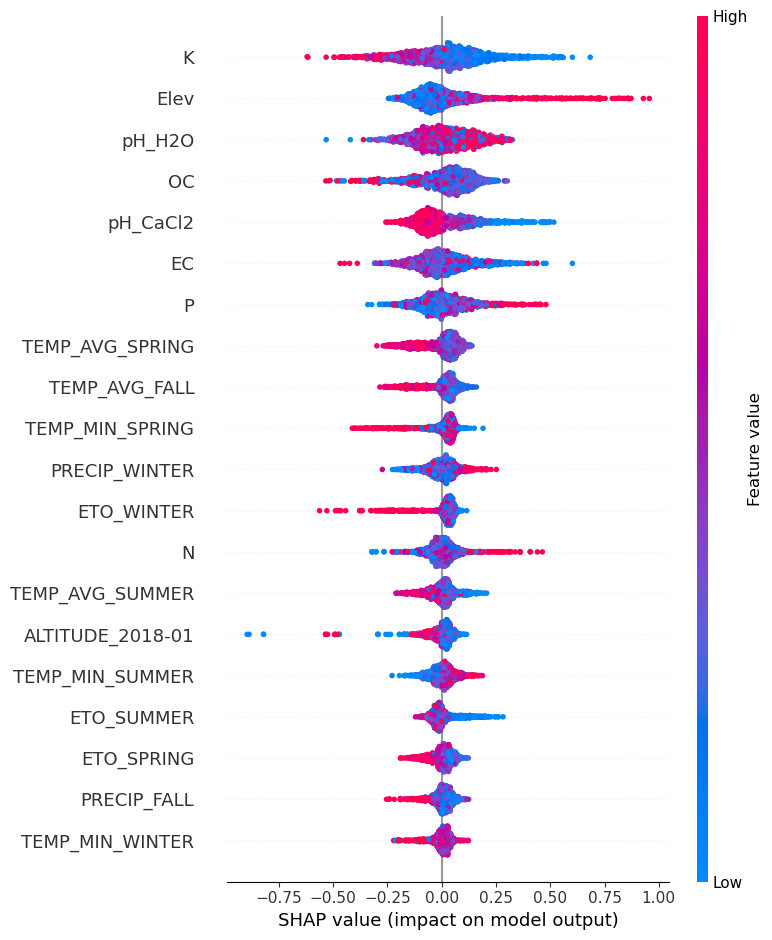

Class 1 SHAP Summary Plot:


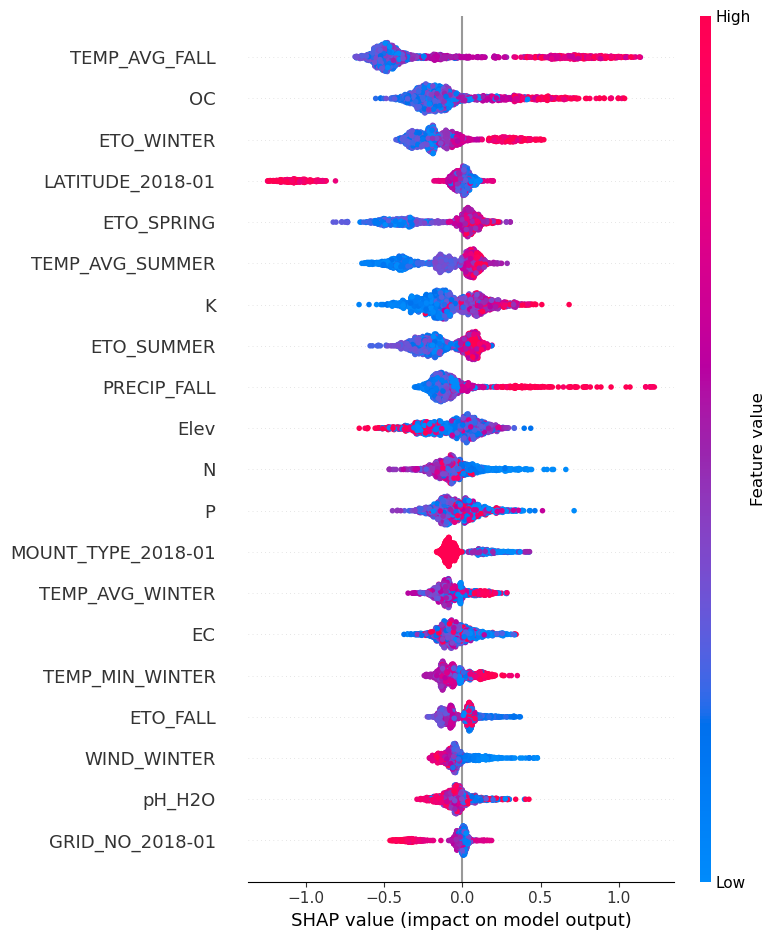

Class 2 SHAP Summary Plot:


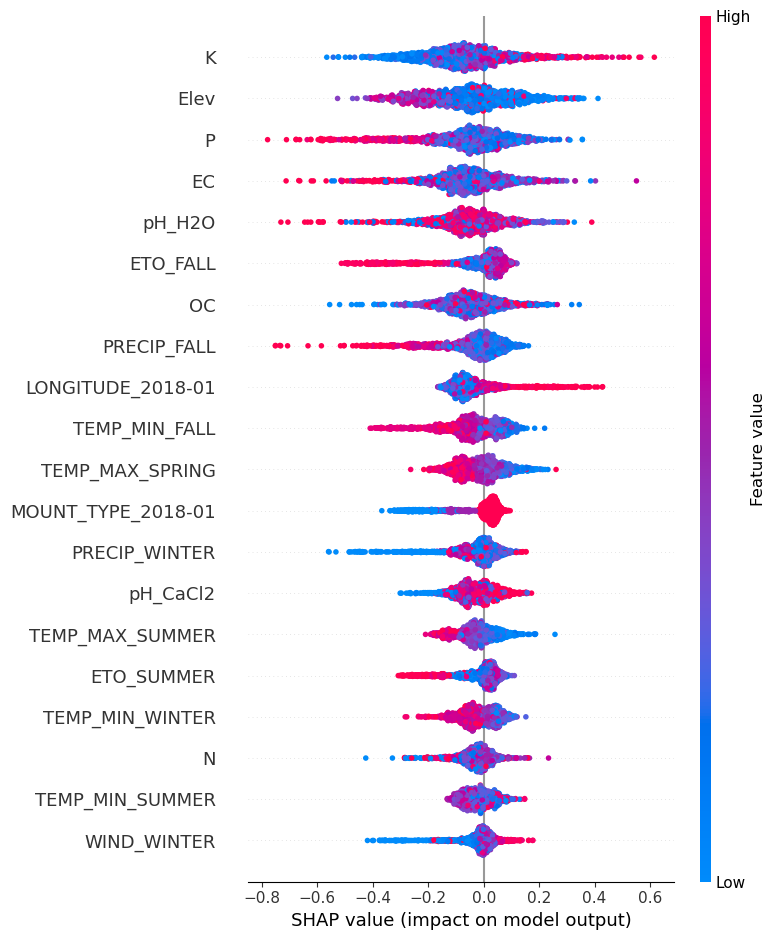

Class 3 SHAP Summary Plot:


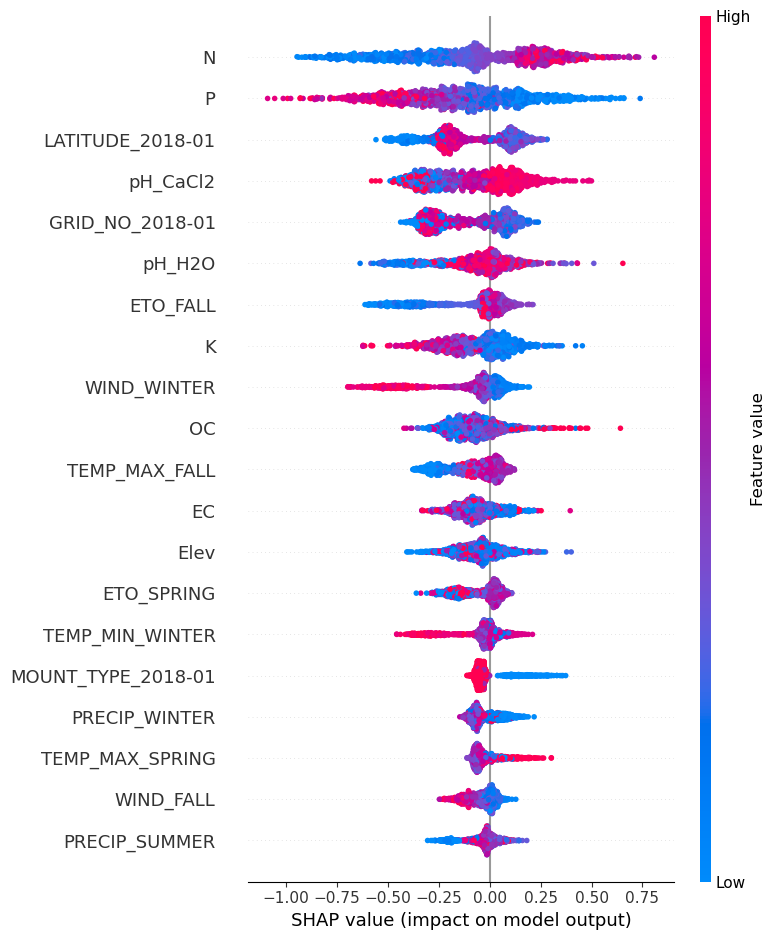

Class 4 SHAP Summary Plot:


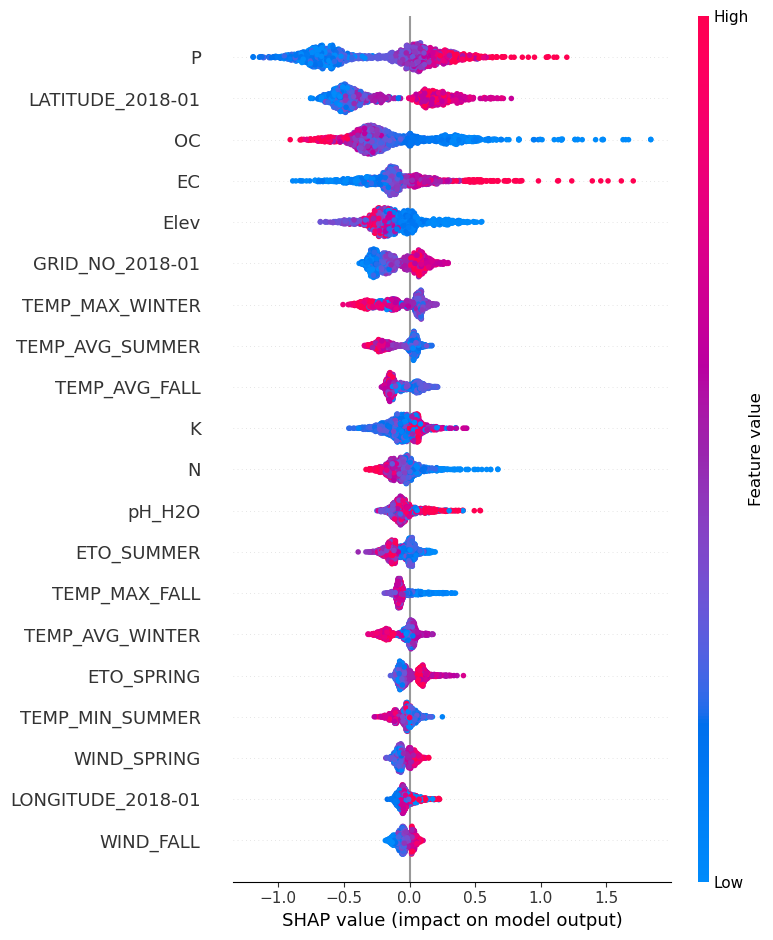

In [199]:
#feature importance with shap
explainer = shap.TreeExplainer(xgb_model)

shap_values = explainer(X_test)

shap_values_list = [shap_values.values[:, :, i] for i in range(5)]

for i in range(5):  # Since you have 5 classes
    print(f"Class {i} SHAP Summary Plot:")
    shap.summary_plot(shap_values_list[i], X_test)

In [279]:
#stacking classifier
estimators = [
    ('RF', RandomForestClassifier(n_estimators=101, max_depth=30, min_samples_split=7, 
                                   min_samples_leaf=1, max_features='log2', bootstrap=False, random_state=42)),
    ('ET', ExtraTreesClassifier(n_estimators=111, max_depth=50, min_samples_split=4,
                               min_samples_leaf=2, max_features=None, random_state=42)),
    ('CAT', CatBoostClassifier(learning_rate=0.05, depth=8, iterations=500, verbose=0, random_state=42)),
    ('LGBM', LGBMClassifier(num_leaves=131, learning_rate=0.07586560077513188, n_estimators=400, max_depth=13, min_child_samples=33, subsample=0.8719615592355736, random_state=42)),
    ('XGB', XGBClassifier(n_estimators=400, learning_rate=0.2802439487737844, max_depth=7, min_child_weight=3, subsample=0.7108071189438797, colsample_bytree=0.9502293080824268, gamma=8.870694755604589e-05, reg_alpha=0.7306027435741603, reg_lambda=0.00022628917486472948, random_state=42)),
    ('LR', LogisticRegression(C=4.6249009083597, solver='lbfgs', max_iter=400,random_state=42)),
    ('MLP', MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=300, random_state=42))
]

meta_model = SVC(probability=True, random_state=42)

stacking_model = StackingClassifier(estimators=estimators, final_estimator=meta_model)

stacking_model.fit(X_train, y_train)

y_pred = stacking_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
balanced_acc = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Balanced Accuracy: {balanced_acc:.4f}')
print(f'Precision (Weighted): {precision:.4f}')
print(f'Recall (Weighted): {recall:.4f}')
print(f'F1 Score (Weighted): {f1:.4f}')


Accuracy: 0.7405
Balanced Accuracy: 0.5349
Precision (Weighted): 0.7249
Recall (Weighted): 0.7405
F1 Score (Weighted): 0.7134
